In [1]:
### Import modules
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import MDAnalysis
import time 
import numpy as np
import math
from DEERpredict  import *
import DEERpredict.utils as calculators
import seaborn as sns
import matplotlib as mpl

/Users/musti/Applications/DEERpredict/DEERpredict/utils.py:21: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/musti/Downloads/PREFIX=/Users/musti/Applications/anaconda/envs/py27/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/musti/Downloads/PREFIX=/Users/musti/Applications/anaconda/envs/py27/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/musti/Downloads/PREFIX=/Users/musti/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/musti/Downloads/PREFIX=/Users/musti/Applications/anaconda/envs/py27/

In [2]:
### SET BASIC VARS

lab = 87 #Select probe position residue number: 24,42,62,87,103
nlen = 133 # Amino acid lenght excluding terminals and prolines 
nx = 4 # dummy, dont need to change it

k = 1.23e-32
mhz_to_rads = 2.0 * math.pi * 1e6
wh = mhz_to_rads * 800 #800 MHz in rad/s
r2 = 12 # s^-1
t = 10e-3 # s

In [3]:
### Load exp file, and datafile from DEER-prredict and weights from BME calculations  
def getExpData(fname):
    resid_exp = []
    data_exp = []
    curr_res = 0 
    with open(fname, 'r') as inp:
        for line in inp.readlines():
            if line=='\n':
                continue
            else:
                curr_res +=1
                
                if line.split()[0]=='nan':
                    print 'parsed empty line'
                else:
                    resid_exp.append(curr_res)
                    data_exp.append(float(line.split()[0]))
                                    
    for v, val in enumerate(resid_exp):
        print str(val)+' '+str(data_exp[v])
                                
    return resid_exp, data_exp


try:
    exp_file = 'data/pre_exp/exp%d.dat'%lab
    resid_exp, data_exp = getExpData(exp_file)
except IOError:
    exp_file = 'data/pre_exp/exp%d.dat'%lab
    resid_exp, data_exp = getExpData(exp_file)


save_file = 'data/pre_A99SB-disp/save%d'%lab ### file for DEER-predict data file

data = pickle.load(open(save_file,'r'))


def gamma_2_load(dist_r6, tau_c, tau_t, wh, k, s_pre):
    return (((4 * ((s_pre * tau_c) + ((1 - s_pre) * tau_t))) + (3 * (
    (s_pre * tau_c) / (1 + ((wh **2.0) * (tau_c ** 2.0))) + (
    ((1 - s_pre) * tau_t) / (1 + ((wh ** 2.0) * (tau_t ** 2.0))))))) * k) * dist_r6

def gamma_2_piana(dist_r6, tau_c, tau_t, wh, k, s_pre):
    return k * dist_r6 * (4*tau_c + np.divide (3 * tau_c, (1 + wh * np.power(tau_c,2))))

def calc_I(gamma_2, t):
    return np.divide((r2 * np.exp(-gamma_2 * t)), (r2 + gamma_2))


for key in data:
    print key

    
frame_ndx = 1
weights=np.loadtxt("data/BME_weight/weight_A99disp") ### load weights from BME calculation
weight = weights[:,1]
weight.shape

parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
parsed empty line
3 0.93
5 0.96
8 0.94
9 1.0
1

(73117,)

In [4]:
#### remove prolines and terminals
resid = range(1,141)
print resid
for pro in [1, 140, 108, 117, 120, 128, 138]:
    resid.remove(pro)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]


probe_res_87.png


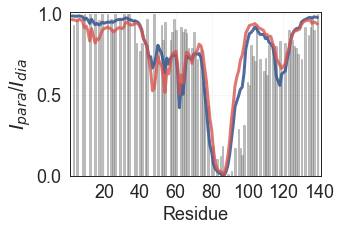

In [5]:
### Plot figure I_para/I_dia vs residue

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["denim blue"]
sns.set_style("white")
sns.set_context("paper")
# handling tickers and read data
from matplotlib.ticker import NullFormatter
from matplotlib import ticker
plt.subplots(1,1,figsize=(4.5, 3))
mpl.rcParams['figure.dpi'] =300
wig=np.reshape(np.array(weight),[-1, 1]) 

###############################

r6 = data['r6'] 
r3 = data['r3']  

### weighted and normalize with BME weights 
r6_weighted = (r6)*wig*len(wig)
r3_weighted = (r3)*wig*len(wig)
cosine_wheighted = (data['cosine'])*wig*len(wig)

r6a = np.nanmean(data['r6'] , axis=0)
r3a = np.nanmean(data['r3'] , axis=0)
cosinea = np.nanmean(data['cosine']  , axis=0)

r6_average = np.nanmean(r6_weighted, axis=0)
r3_average = np.nanmean(r3_weighted, axis=0)
cosine_average = np.nanmean(cosine_wheighted, axis=0)


##############################

signal_average_dist = calculators.Operations.gamma_2(r6_average, r3_average,3.4e-09, 1e-12, wh, k, cosine_average)
signal_relaxed_gamma = calculators.Operations.gamma_2(r6a, r3a, 2.3e-09, 1e-12, wh, k, cosinea)

I_ratio_averaged = calc_I(signal_average_dist, t)
I_ratio_relaxed = calc_I(signal_relaxed_gamma, t)

#print signal_relaxed_gamma.shape
plt.plot(resid,I_ratio_averaged,color=c3,lw=3,alpha=.9,label='Reweighted')
plt.plot(resid,I_ratio_relaxed,color=c2,lw=3,alpha=0.8,label='Simulation')
plt.bar(resid_exp, data_exp,alpha=.5,width=0.9,label='Exp', color='grey',align='center',edgecolor='grey')
plt.tick_params(axis='both', labelsize=18)
# ttl = plt.title(lab,size=22)
# ttl.set_position([.5, 1.1])
plt.rcParams['figure.constrained_layout.use'] = True
plt.xlabel('Residue',size=18)

plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(min(resid)-2, max(resid)+2, 20.0))
plt.ylim(0,1.01)
plt.xlim(1,141)
plt.ylabel('$I_{para}$/$I_{dia}$',size=20)
plt.rcParams.update({'legend.fontsize':14})
#plt.legend(loc='upper center', bbox_to_anchor=(0.48, 1.18),
#          ncol=3, fancybox=True, shadow=False)
#plt.xticks(resid)

name='probe_res_' + np.str(lab) + '.png' 
print name
#plt.legend(fancybox=True,shadow=True)
plt.grid(alpha=0.2)
#plt.savefig(name,dpi=500)

plt.show()

FF min:  2.1   Rew min:  2.9


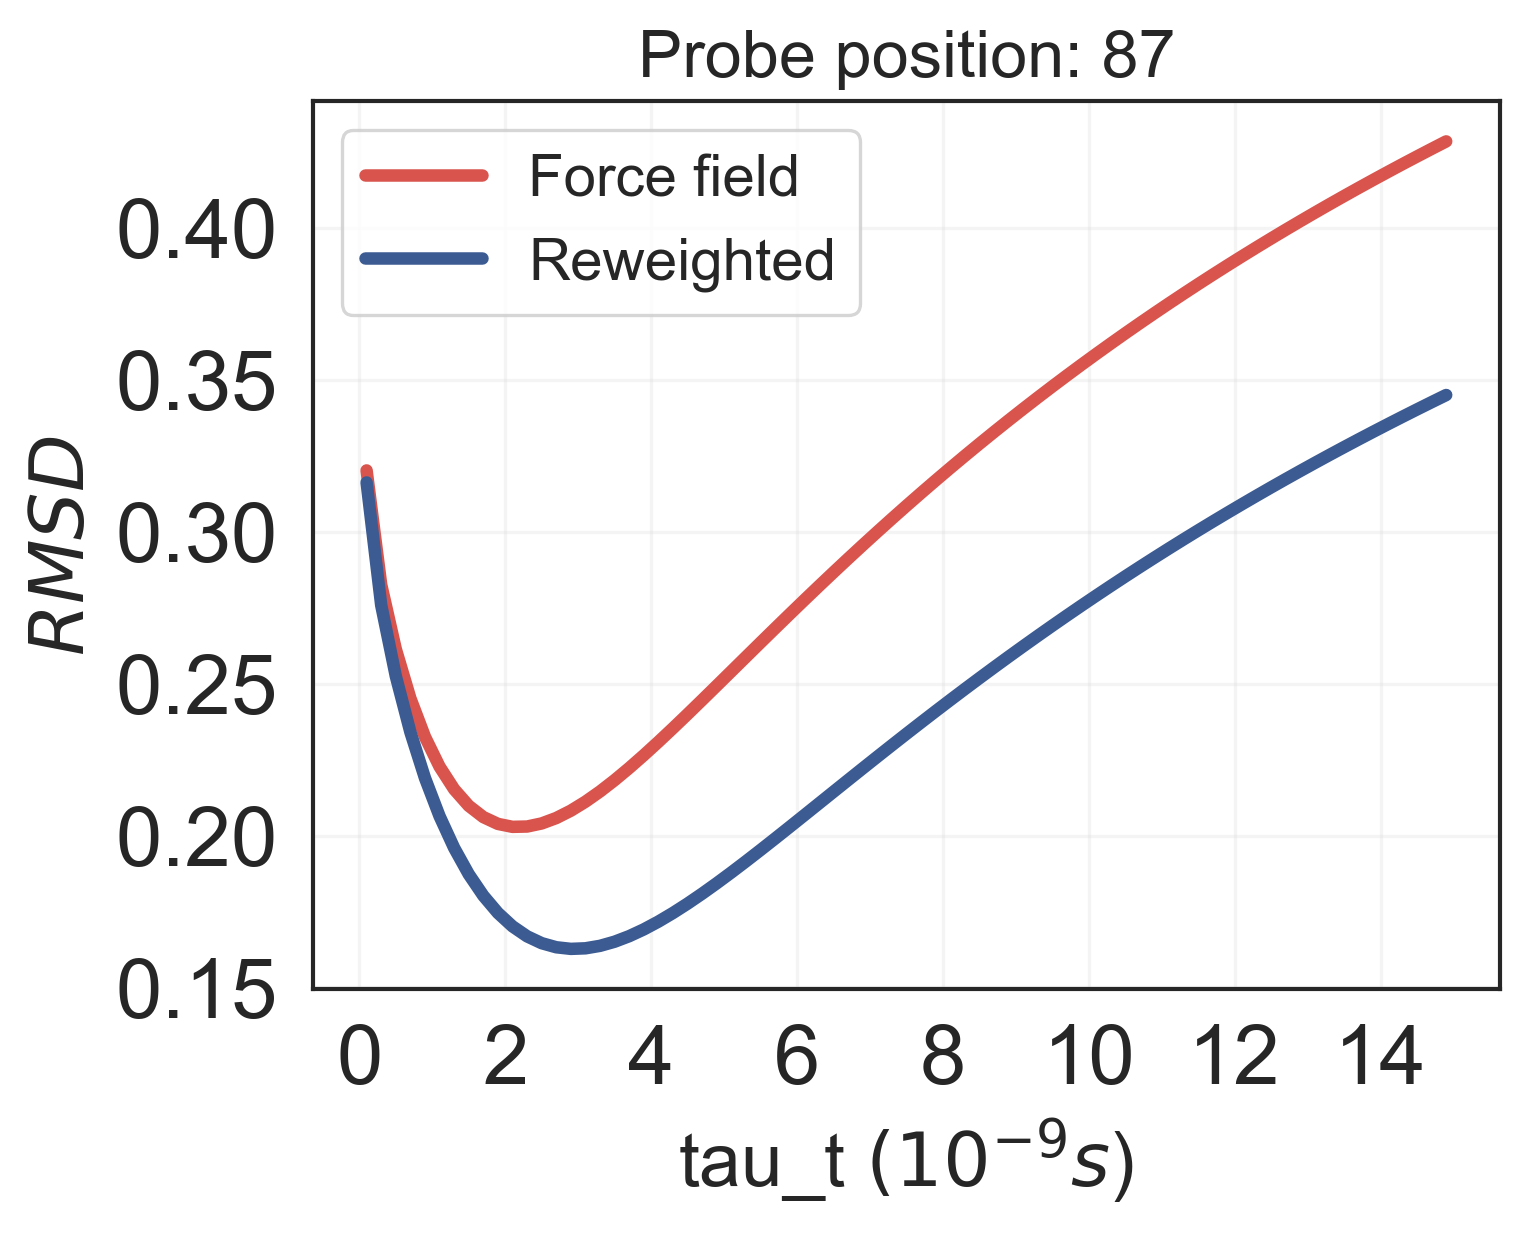

In [6]:
### Optimize tou_c by iteerrating over tau_c and finding minimum
tau_c_vec = np.arange(.1,15,.2)
def calcRMSDcb_all(resid, i_ratio, resid_exp, data_exp):
    error = 0.0
    no_points = 0
  
    for r, res in enumerate(resid):
        if r <= 120 :
            if res in resid_exp:
    #             print 'here'
    #             print res
    #             print data_exp[resid_exp.index(res)]
    #             print i_ratio[r]
                exp_val = data_exp[resid_exp.index(res)]
                pred_val = i_ratio[r]            
                if exp_val >= 1.0:# and exp_val >= 0.1: #now use dynamic range 0.1-0.9
                    exp_val = 1.0
                error_tmp = np.power(exp_val - pred_val,2)
                #error_tmp = np.sqrt(np.power(exp_val - pred_val,2))
                #print error_tmp
                error += error_tmp
                no_points += 1
                #print error
    return np.sqrt(np.divide(error, no_points)) 

def getI(a,b,c,d, wh, k, e, nlen):
        relaxed_gamma2 = calculators.Operations.gamma_2(a, b,  c,d, wh, k, e)
        i_ratio = calc_I(relaxed_gamma2, t)
        return i_ratio


error_dict_un={}
error_dict_w={}
plt.subplots(1,1,figsize=(5, 4))
mpl.rcParams['figure.dpi'] =500
for tau in tau_c_vec:
    tau_c = tau*1e-9
    
    i_ratio_un = getI(r6a, r3a,  tau_c,1e-12, wh, k, cosinea , nlen)
    i_ratio_w = getI(r6_average,r3_average,tau_c,1e-12, wh, k,cosine_average , nlen)
    error_un = calcRMSDcb_all(resid, i_ratio_un, resid_exp, data_exp)
    error_dict_un[tau]= error_un
    error_w = calcRMSDcb_all(resid, i_ratio_w, resid_exp, data_exp)
    error_dict_w[tau]= error_w
   
    #plt.plot(resid,i_ratio,label=str(tau))


error_un = sorted(error_dict_un.items()) # sorted by key, return a list of tuples
error_w = sorted(error_dict_w.items())
print "FF min: ", '{0:.3g}'.format(min(error_dict_un, key=error_dict_un.get)), "  Rew min: ", '{0:.3g}'.format(min(error_dict_w, key=error_dict_w.get))
x, y = zip(*error_un)
x1,y1 =zip(*error_w)

plt.title("Probe position: " + str(lab),size=16)
plt.plot(x, y,lw=3,c=c2,label ='Force field')
plt.plot(x1, y1,lw=3,c=c3,label ='Reweighted')
plt.xlabel('tau_t $(10^{-9} s$)',size=18)
plt.ylabel('$RMSD$',size=18)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(alpha=0.2)
plt.legend()
plt.show()


0.17270205557549104 0.15859382081279208


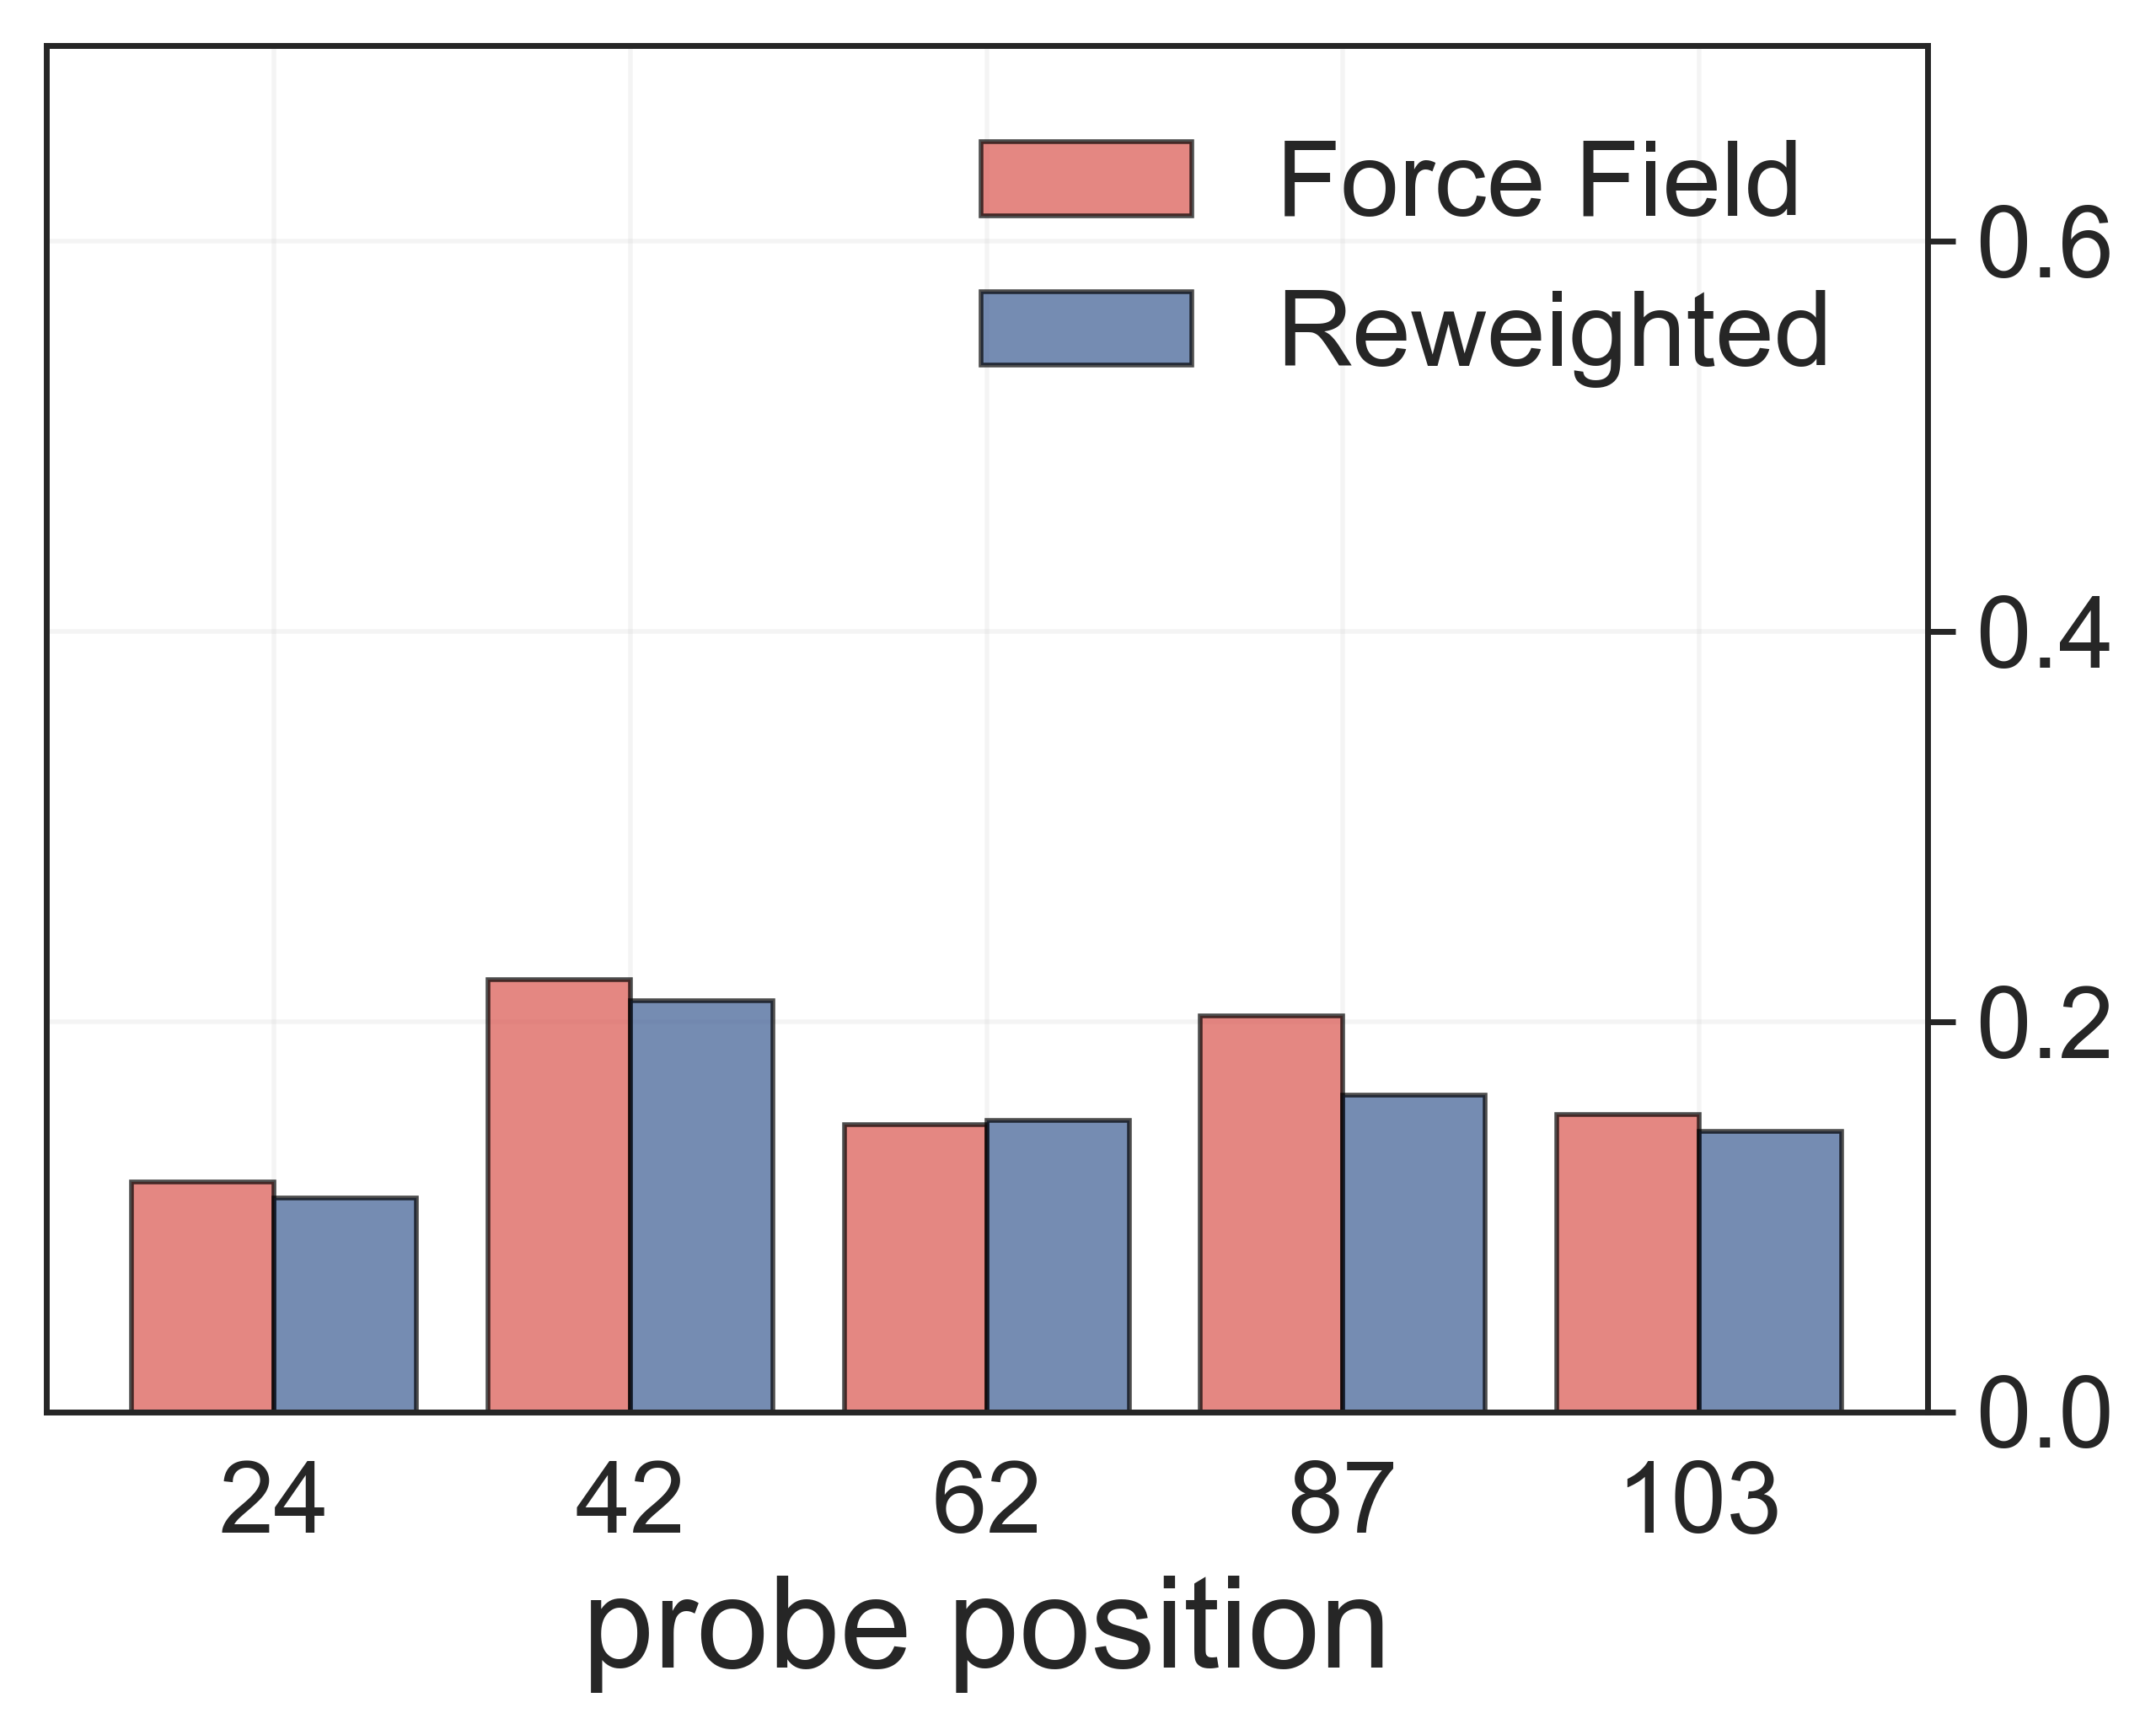

In [7]:
### The numbers below was obtained by iterateing the analysis for all FF
Rew = [0.01205,0.0443,0.0223,0.0264,0.02071]
FF = [0.0139,0.04913,0.0217,0.0412,0.0232]
a99_dispW= np.sqrt(np.average(Rew))
a99_dispFF= np.sqrt(np.mean(FF))
print a99_dispFF,a99_dispW

fig,ax = plt.subplots(1,1,figsize=(5,4))
pnr=np.arange(0,5)
probelablel= ["0",'24',"42","62",'87','103']
mpl.rcParams['figure.dpi'] = 500
ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FF),alpha=.7,color=c2,label='Force Field',width=0.4, edgecolor = "black",align='center')
plt.bar(pnr+0.2,np.sqrt(Rew),alpha=.7,color=c3,label='Reweighted',width=0.4, edgecolor = "black",align='center')
plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=22)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', labelsize=17)
plt.xticks(size=16)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
#plt.ylabel('$RMSD$',fontsize=18)
#plt.savefig('a99-disp-RMSD',dpi=500)
plt.show()

0.16003471339134745 0.14372157254921505


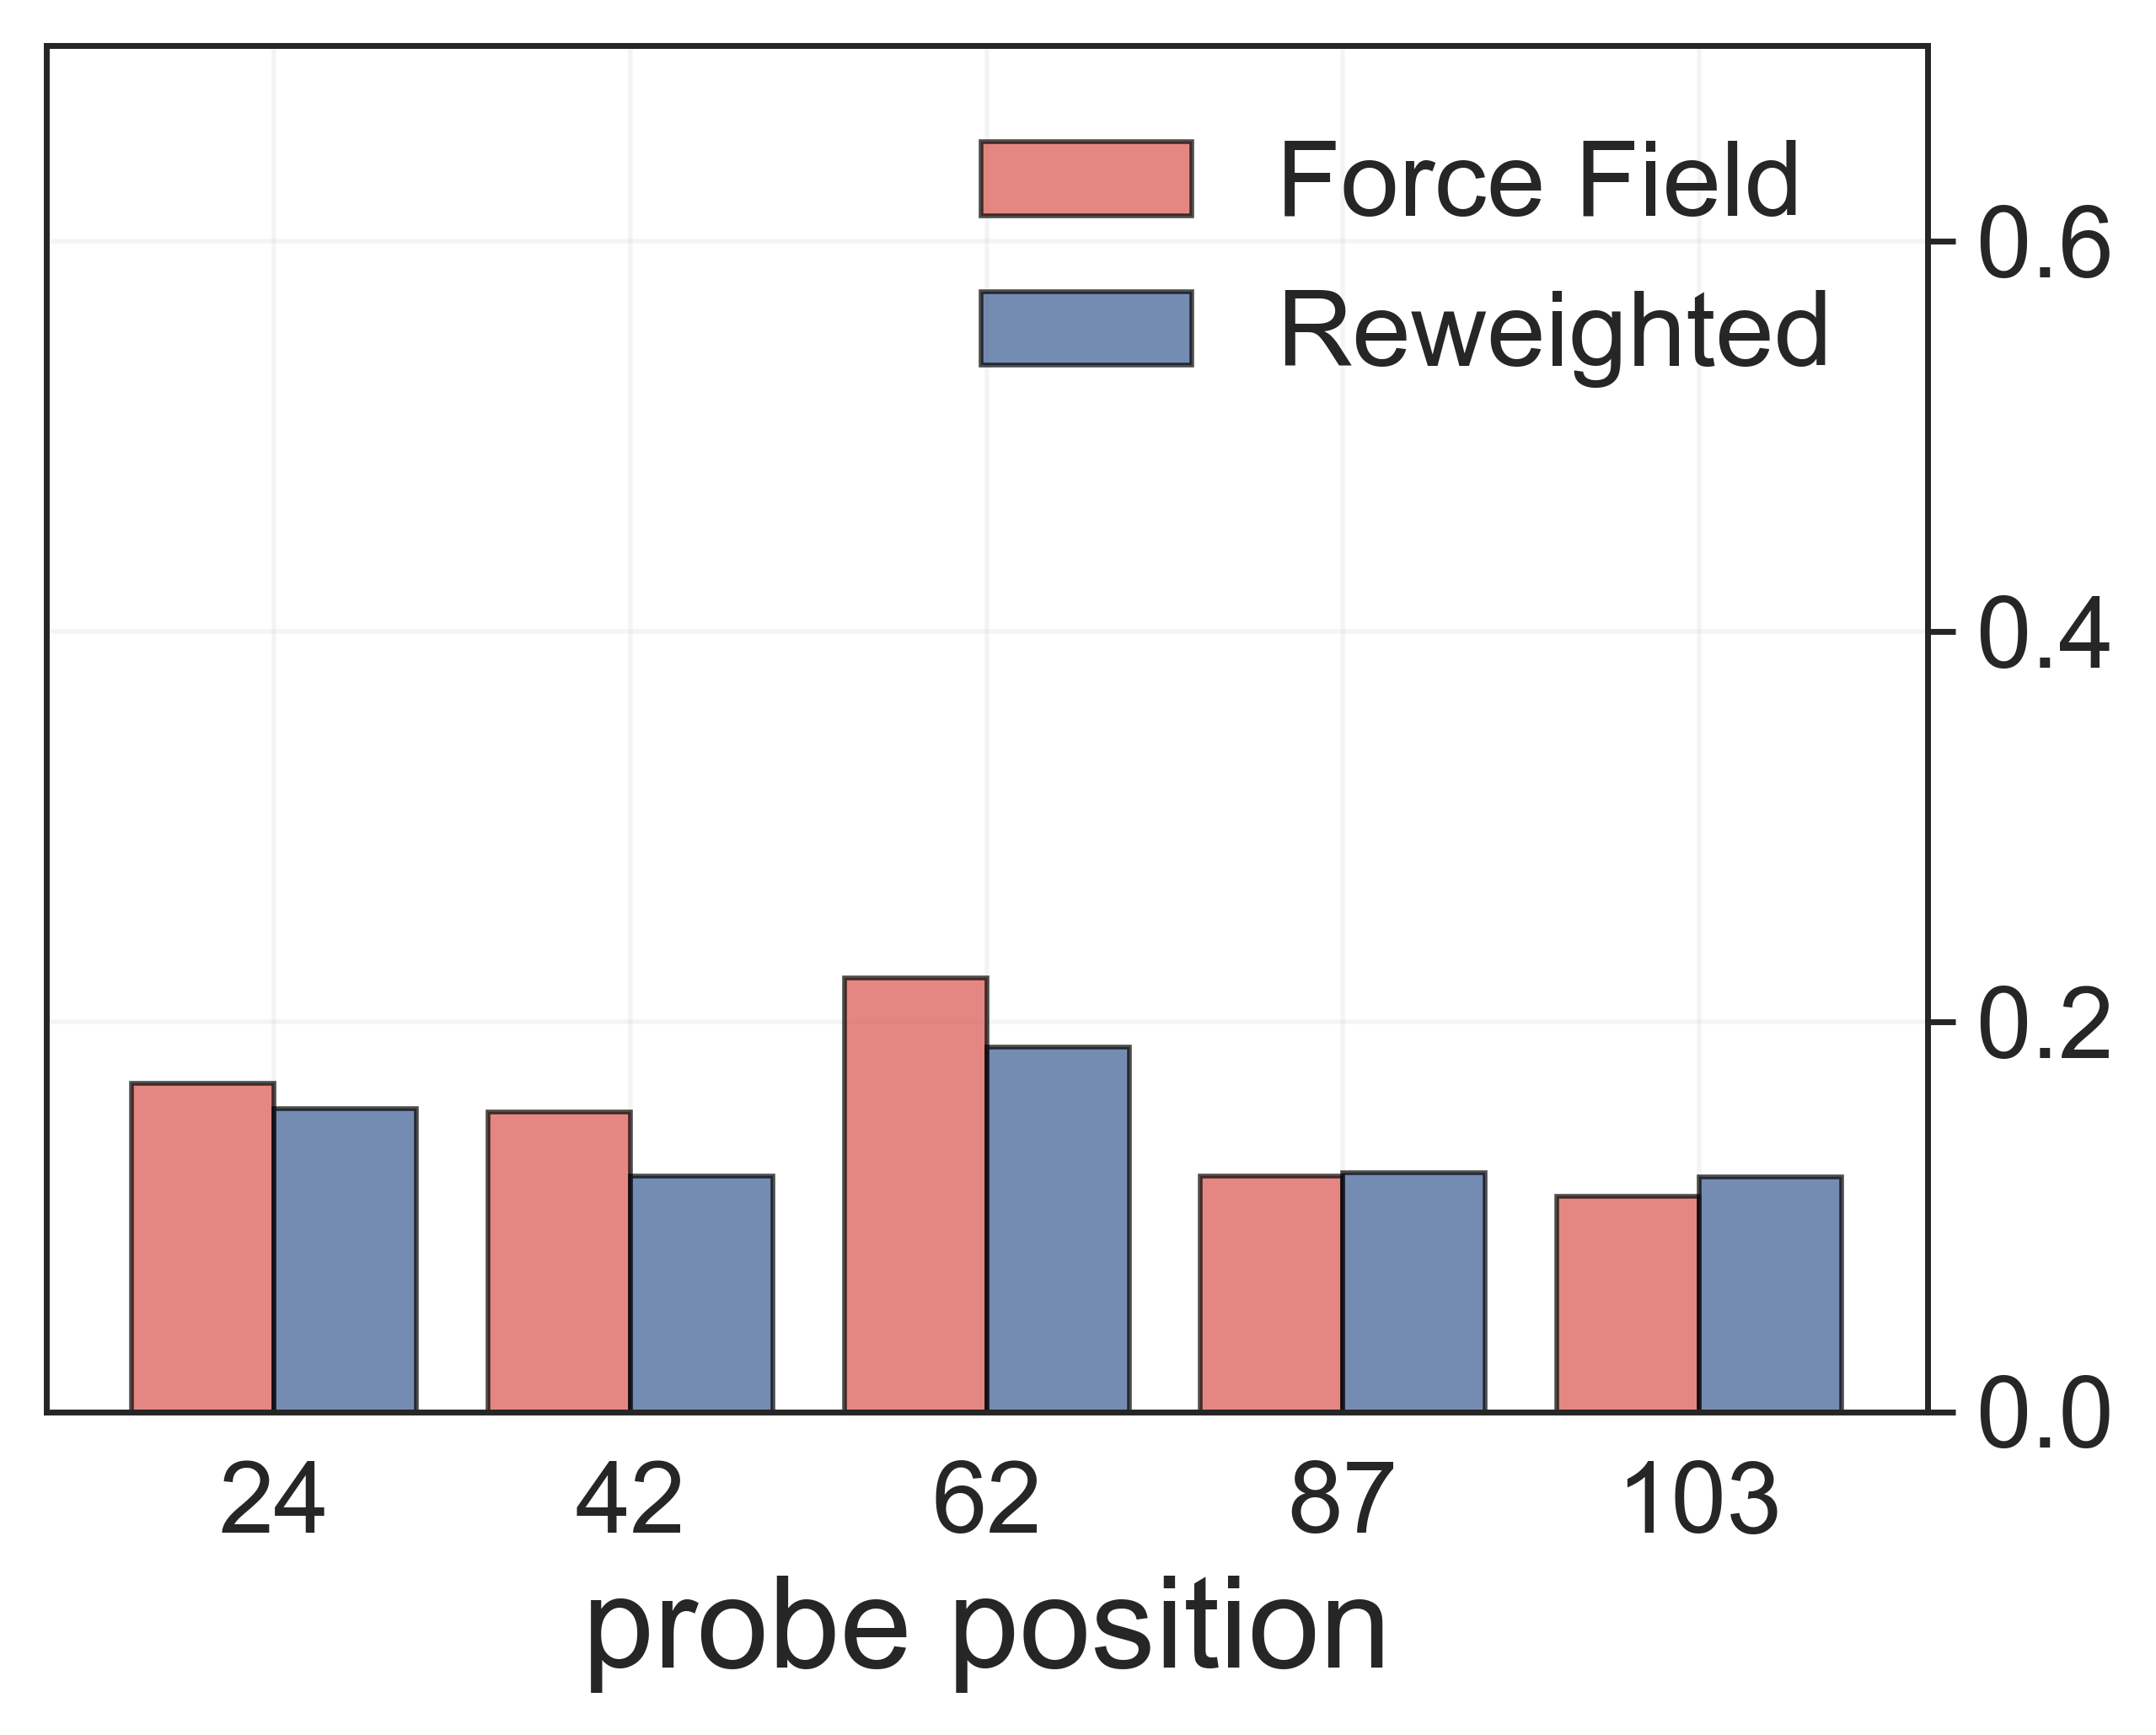

In [8]:
Rewa03 = [0.024088070872575276,0.014637506360121434,0.03501073634291031,0.015038482019827165,0.01450465648466225]
FFa03 =  [0.028363326462692198,0.023582243340244717,0.049366144505583666,0.014566966111490401,0.012176867031242619]

a03W= np.sqrt(np.average(Rewa03))
a03FF= np.sqrt(np.mean(FFa03))
print a03FF,a03W 

fig,ax = plt.subplots(1,1,figsize=(5,4))
probelablel= ["0",'24',"42","62",'87','103']
mpl.rcParams['figure.dpi'] = 500
ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FFa03),alpha=.7,color=c2,label='Force Field',width=0.4, edgecolor = "black",align='center')
plt.bar(pnr+0.2,np.sqrt(Rewa03),alpha=.7,color=c3,label='Reweighted',width=0.4,edgecolor = "black", align='center')
plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=22)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', labelsize=17)
plt.xticks(size=16)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
#plt.ylabel('$RMSD$',fontsize=18)
#plt.savefig('a03-RMSD',dpi=500)
plt.show()

0.14314024083066787 0.1393989146360113


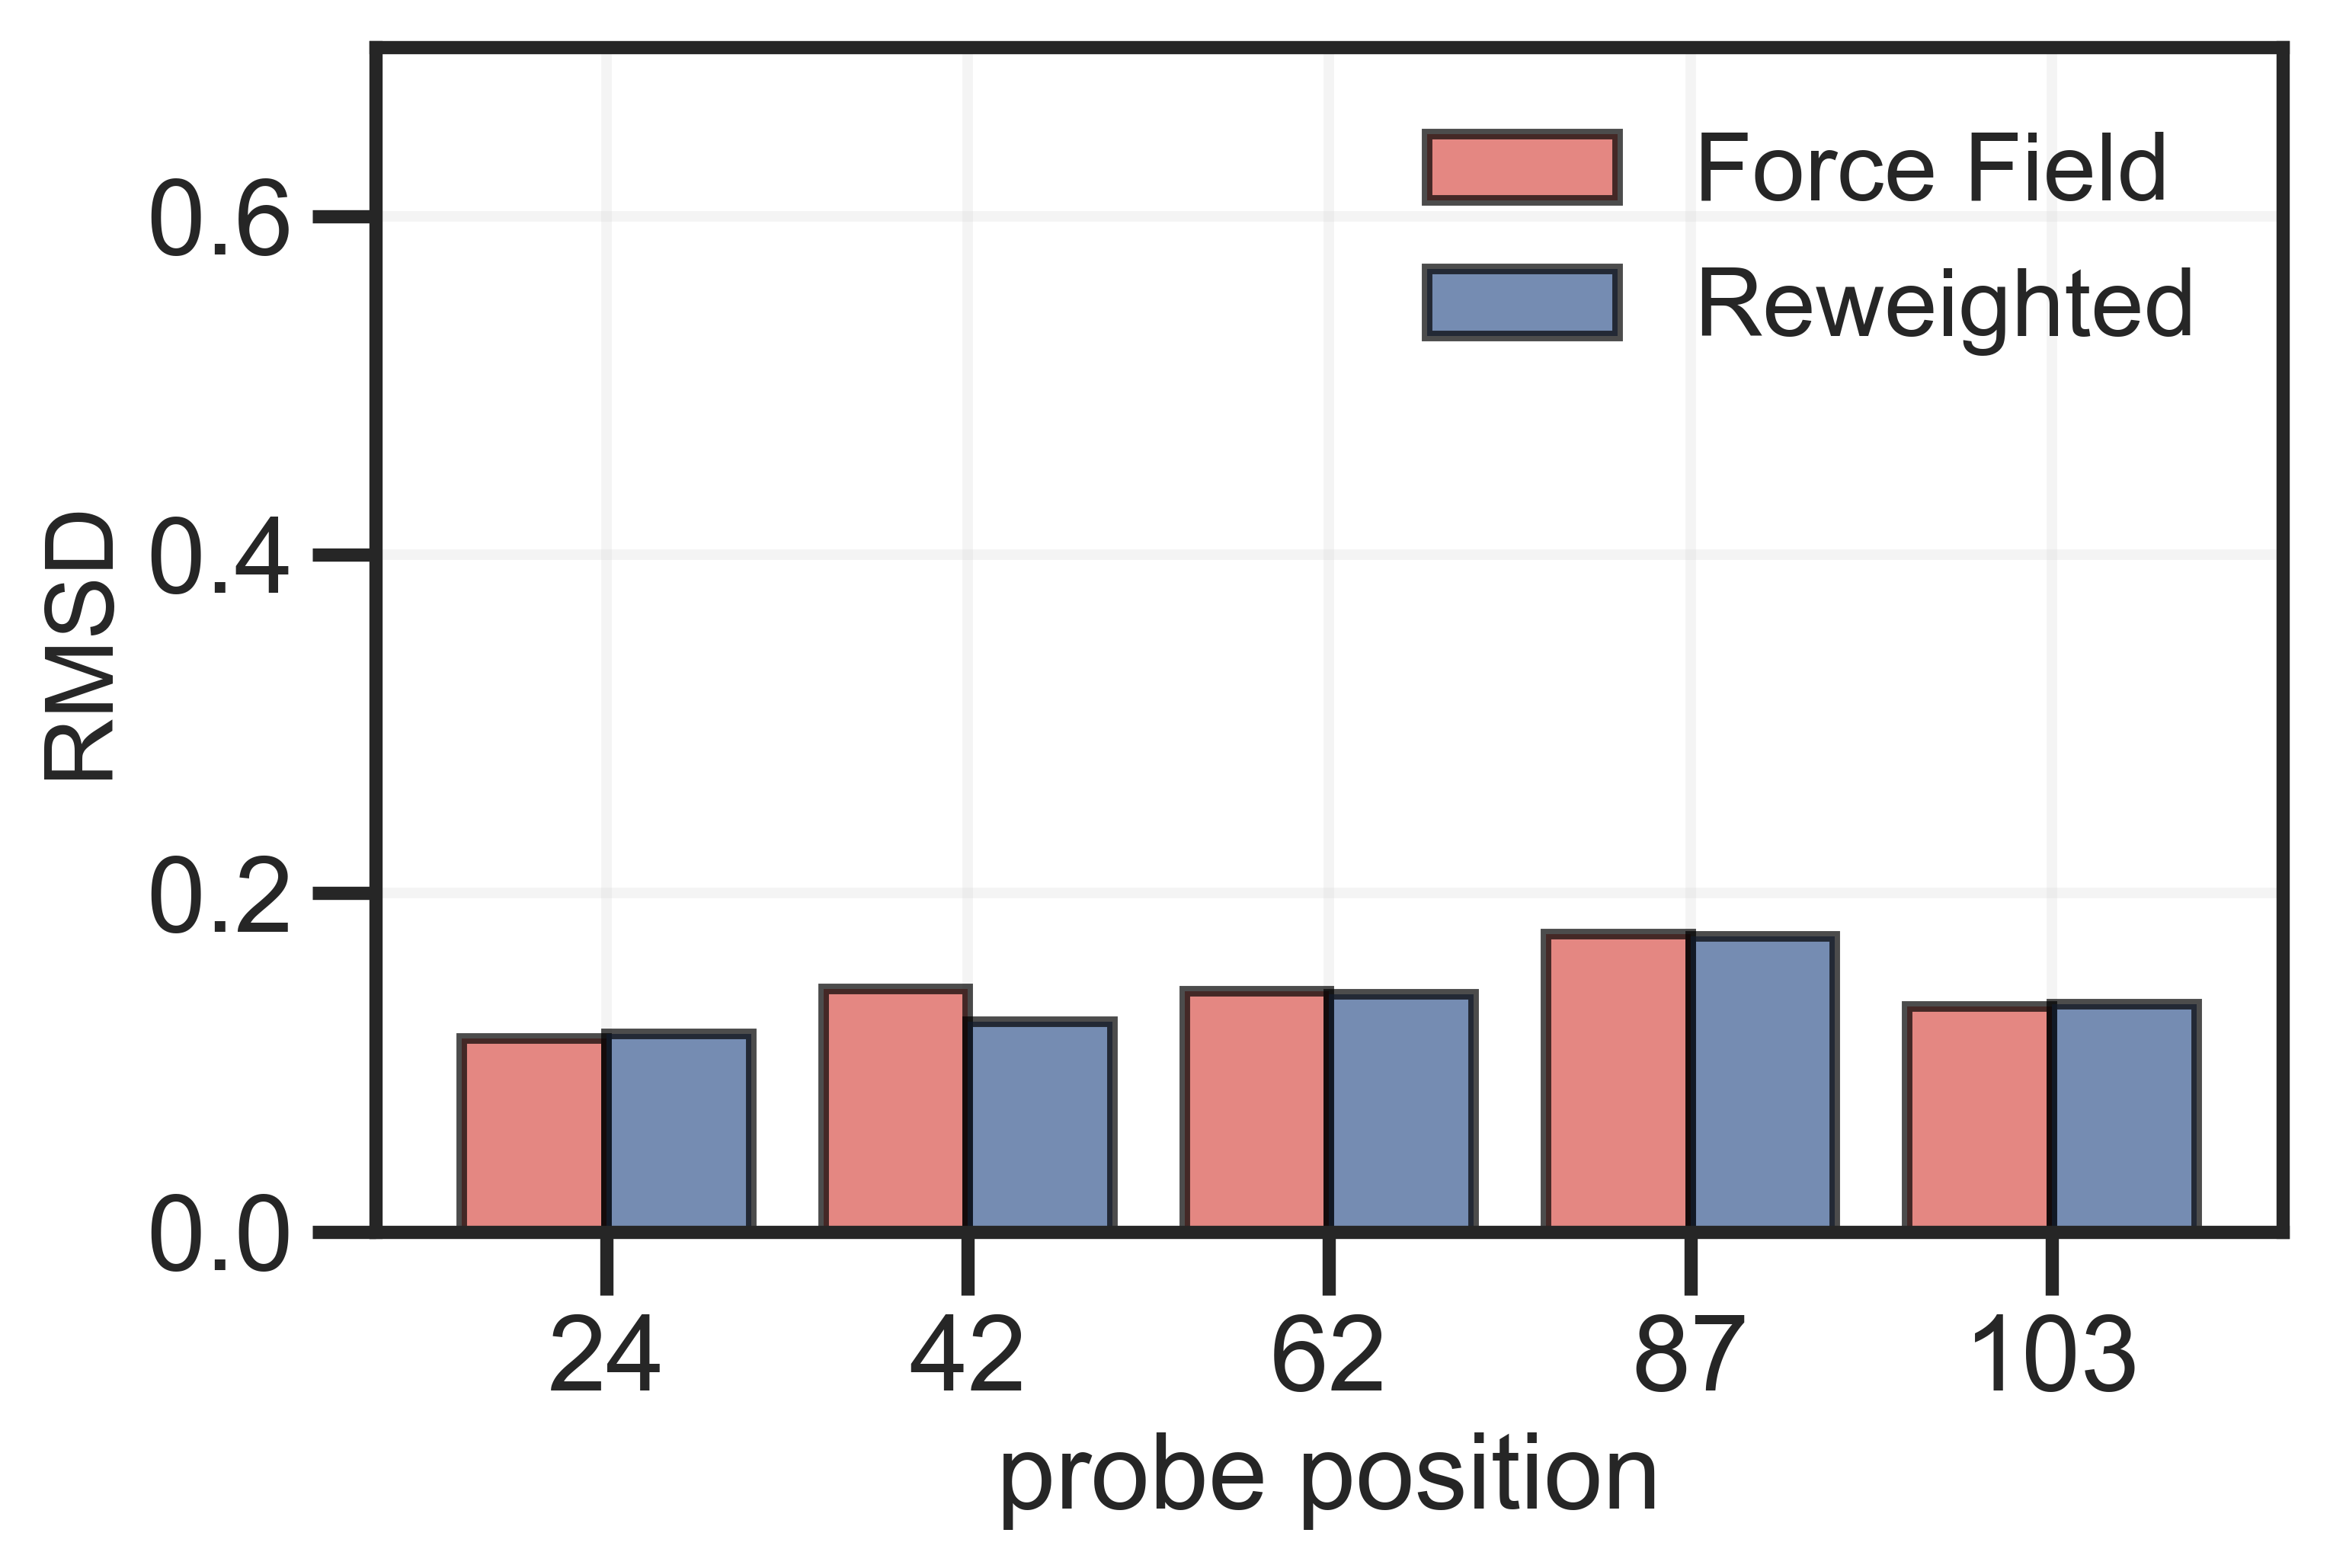

In [9]:
Rew_a12D = [0.013640686811228148,0.015346665254775722,0.019729225798698354,0.03039004986086234,0.018053659282925265]
FF_a12D =  [0.013021937397181486,0.020610090770508432,0.02017674501319377,0.030978533377308323,.017658336167115977]
a12DW= np.sqrt(np.average(Rew_a12D))
a12DFF= np.sqrt(np.average(FF_a12D))
print a12DFF,a12DW
mpl.rcParams['figure.dpi'] =500
sns.set_style("ticks")
sns.set_context("poster")
fig,ax = plt.subplots(1,1,figsize=(6,4))
probelablel= ["0",'24',"42","62",'87','103']
plt.rcParams['figure.constrained_layout.use'] = True

ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FF_a12D),alpha=.7,color=c2,label='Force Field',width=0.4,edgecolor = "black", align='center')
plt.bar(pnr+0.2,np.sqrt(Rew_a12D),alpha=.7,color=c3,label='Reweighted',width=0.4,edgecolor = "black", align='center')
plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=20)
#plt.ylabel("RMSD")
ax.tick_params(axis='both', labelsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
plt.ylabel('RMSD',fontsize=18)
plt.savefig('a12D-RMSD',dpi=500)
plt.show()

0.46240437300627046 0.3310959636268179


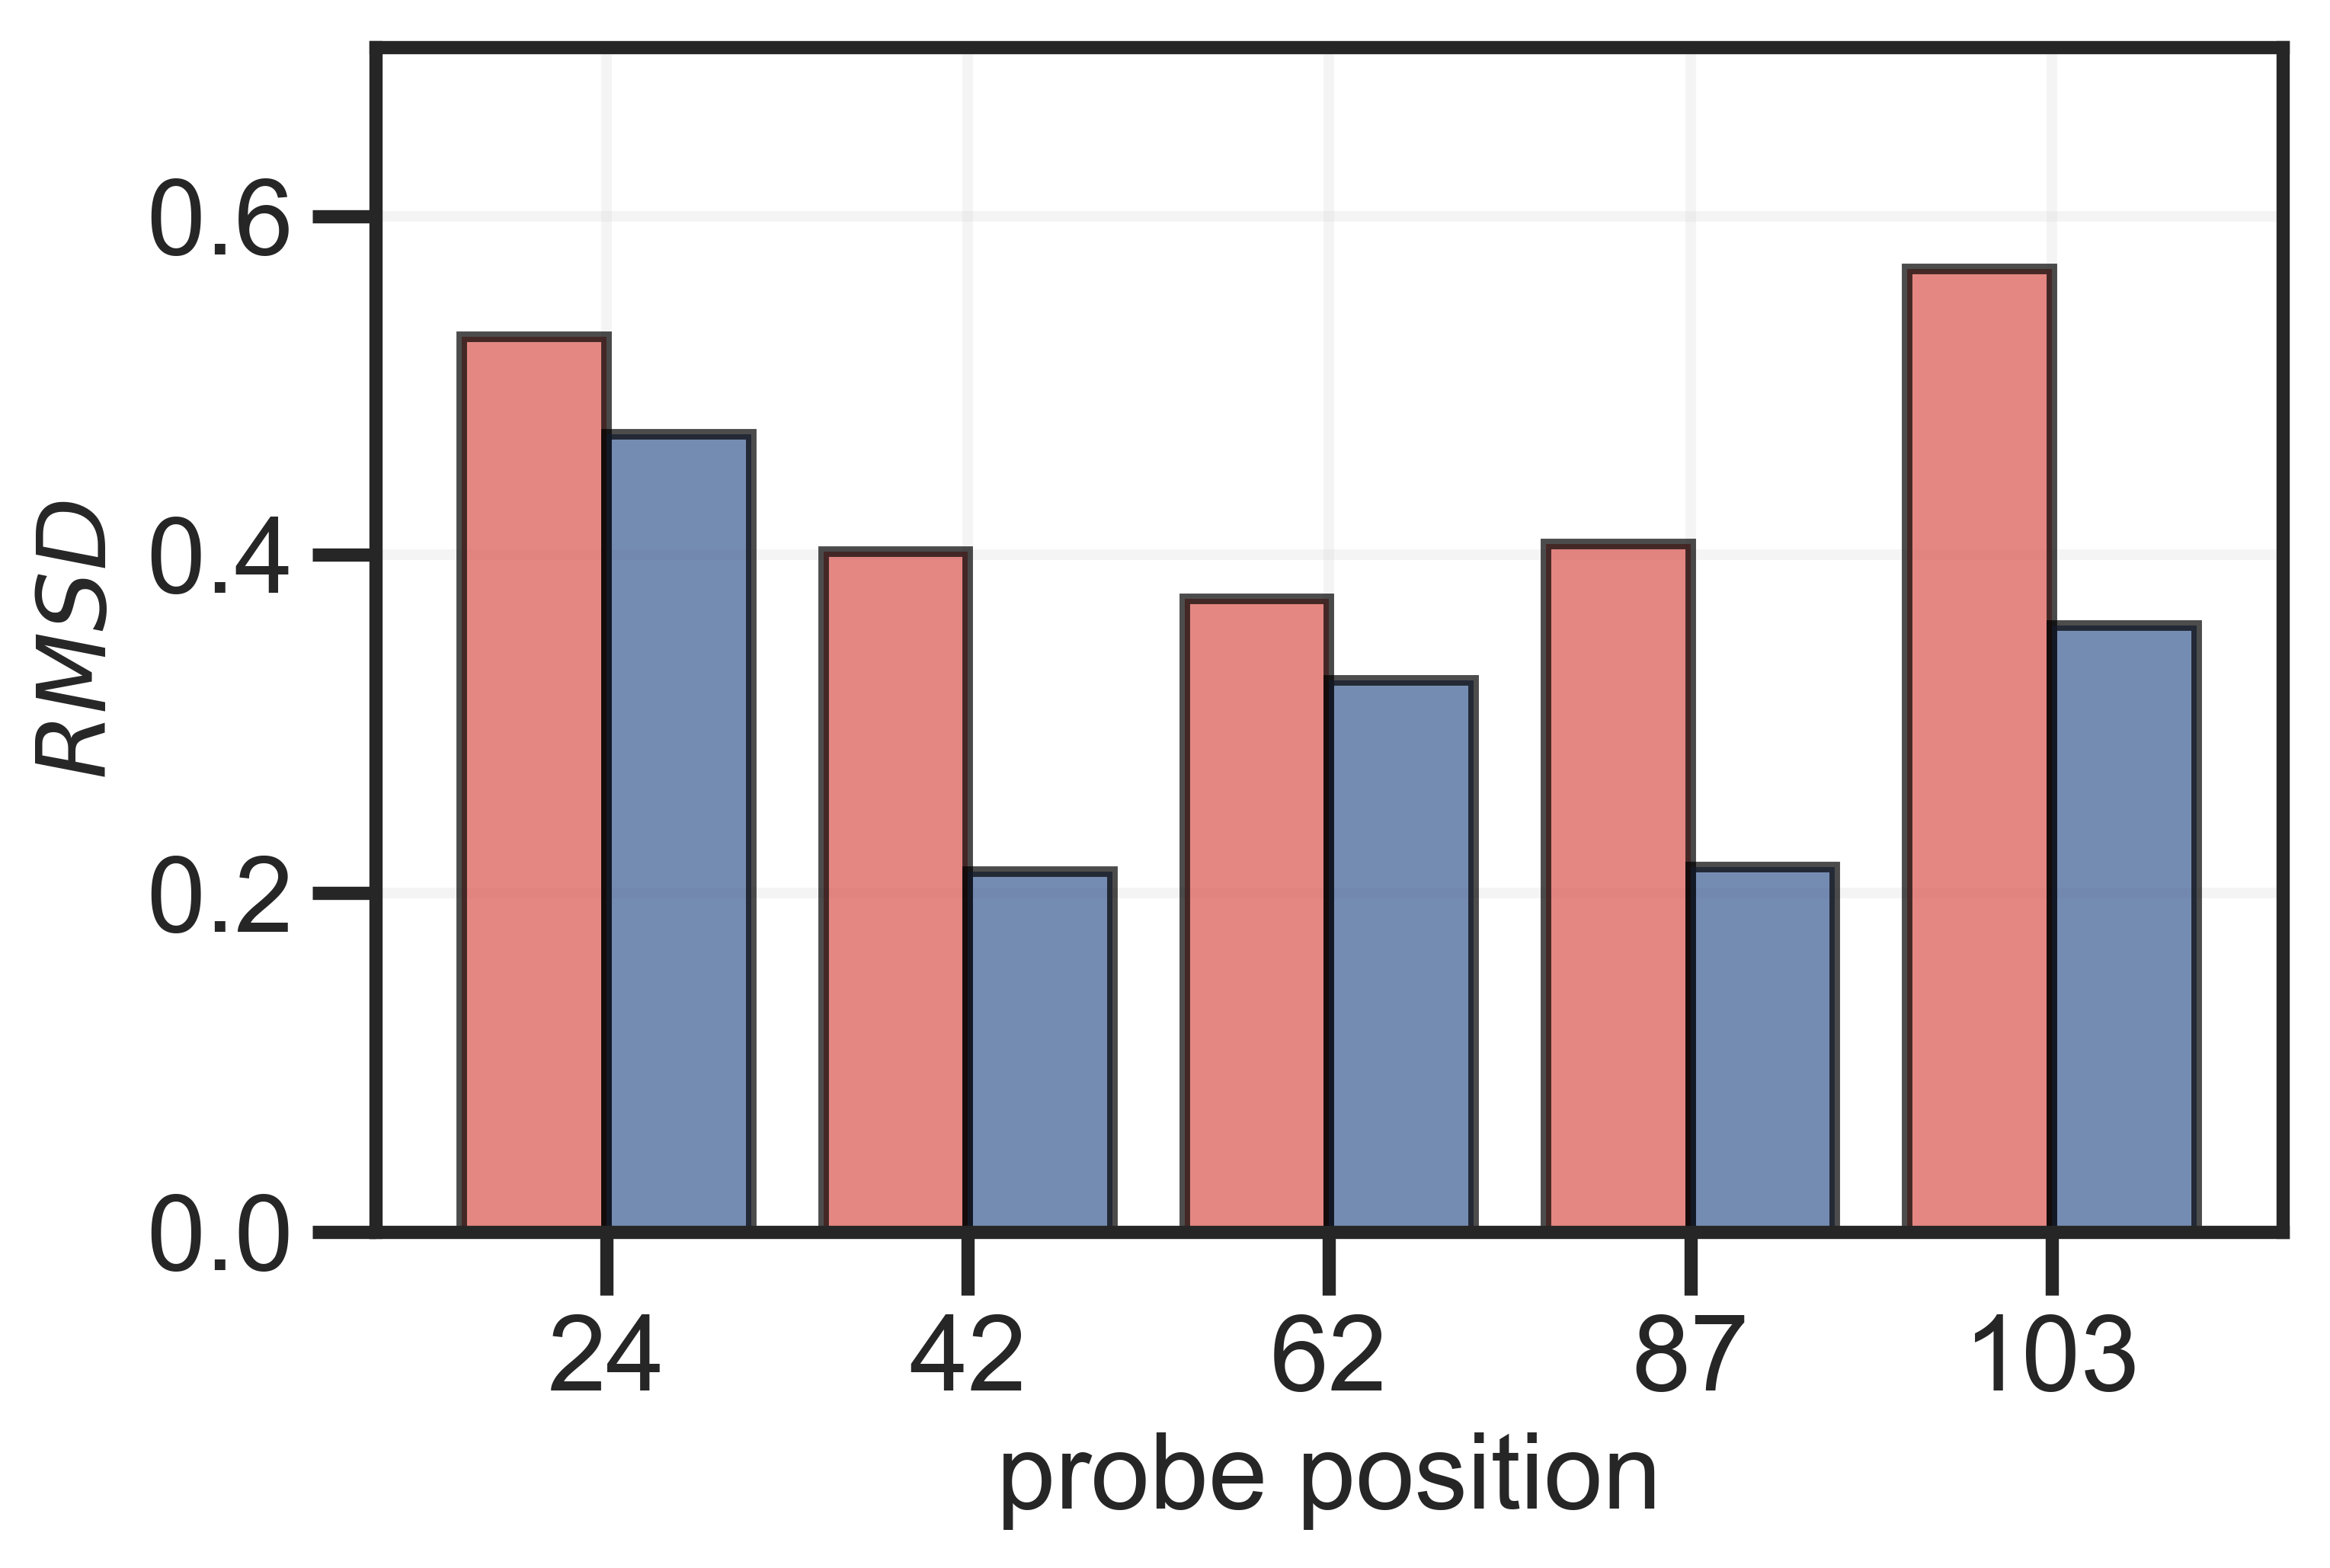

In [10]:
Rew_a12 = [0.2221457403955318,0.04528765807878092,0.10608129053613649,0.04637851967627848,0.12822947696312795]
FF_a12 =  [0.2794085314492109,0.16131512976551915,0.1397351996323571,0.16524039745956576,0.3233897625699579]
a12W= np.sqrt(np.average(Rew_a12))
a12FF= np.sqrt(np.average(FF_a12))
print a12FF,a12W

fig,ax = plt.subplots(1,1,figsize=(6,4))
probelablel= ["0",'24',"42","62",'87','103']

mpl.rcParams['figure.dpi'] = 500
plt.rcParams['figure.constrained_layout.use'] = True
ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FF_a12),alpha=.7,color=c2,label='Force Field',width=0.4, edgecolor = "black",align='center')
plt.bar(pnr+0.2,np.sqrt(Rew_a12),alpha=.7,color=c3,label='Reweighted',width=0.4,edgecolor = "black", align='center')
#plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=20)
plt.ylabel("RMSD")
ax.tick_params(axis='both', labelsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
plt.ylabel('$RMSD$',fontsize=18)
plt.savefig('a12-RMSD',dpi=500)
plt.show()

0.21708987613518085 0.18717991424672256


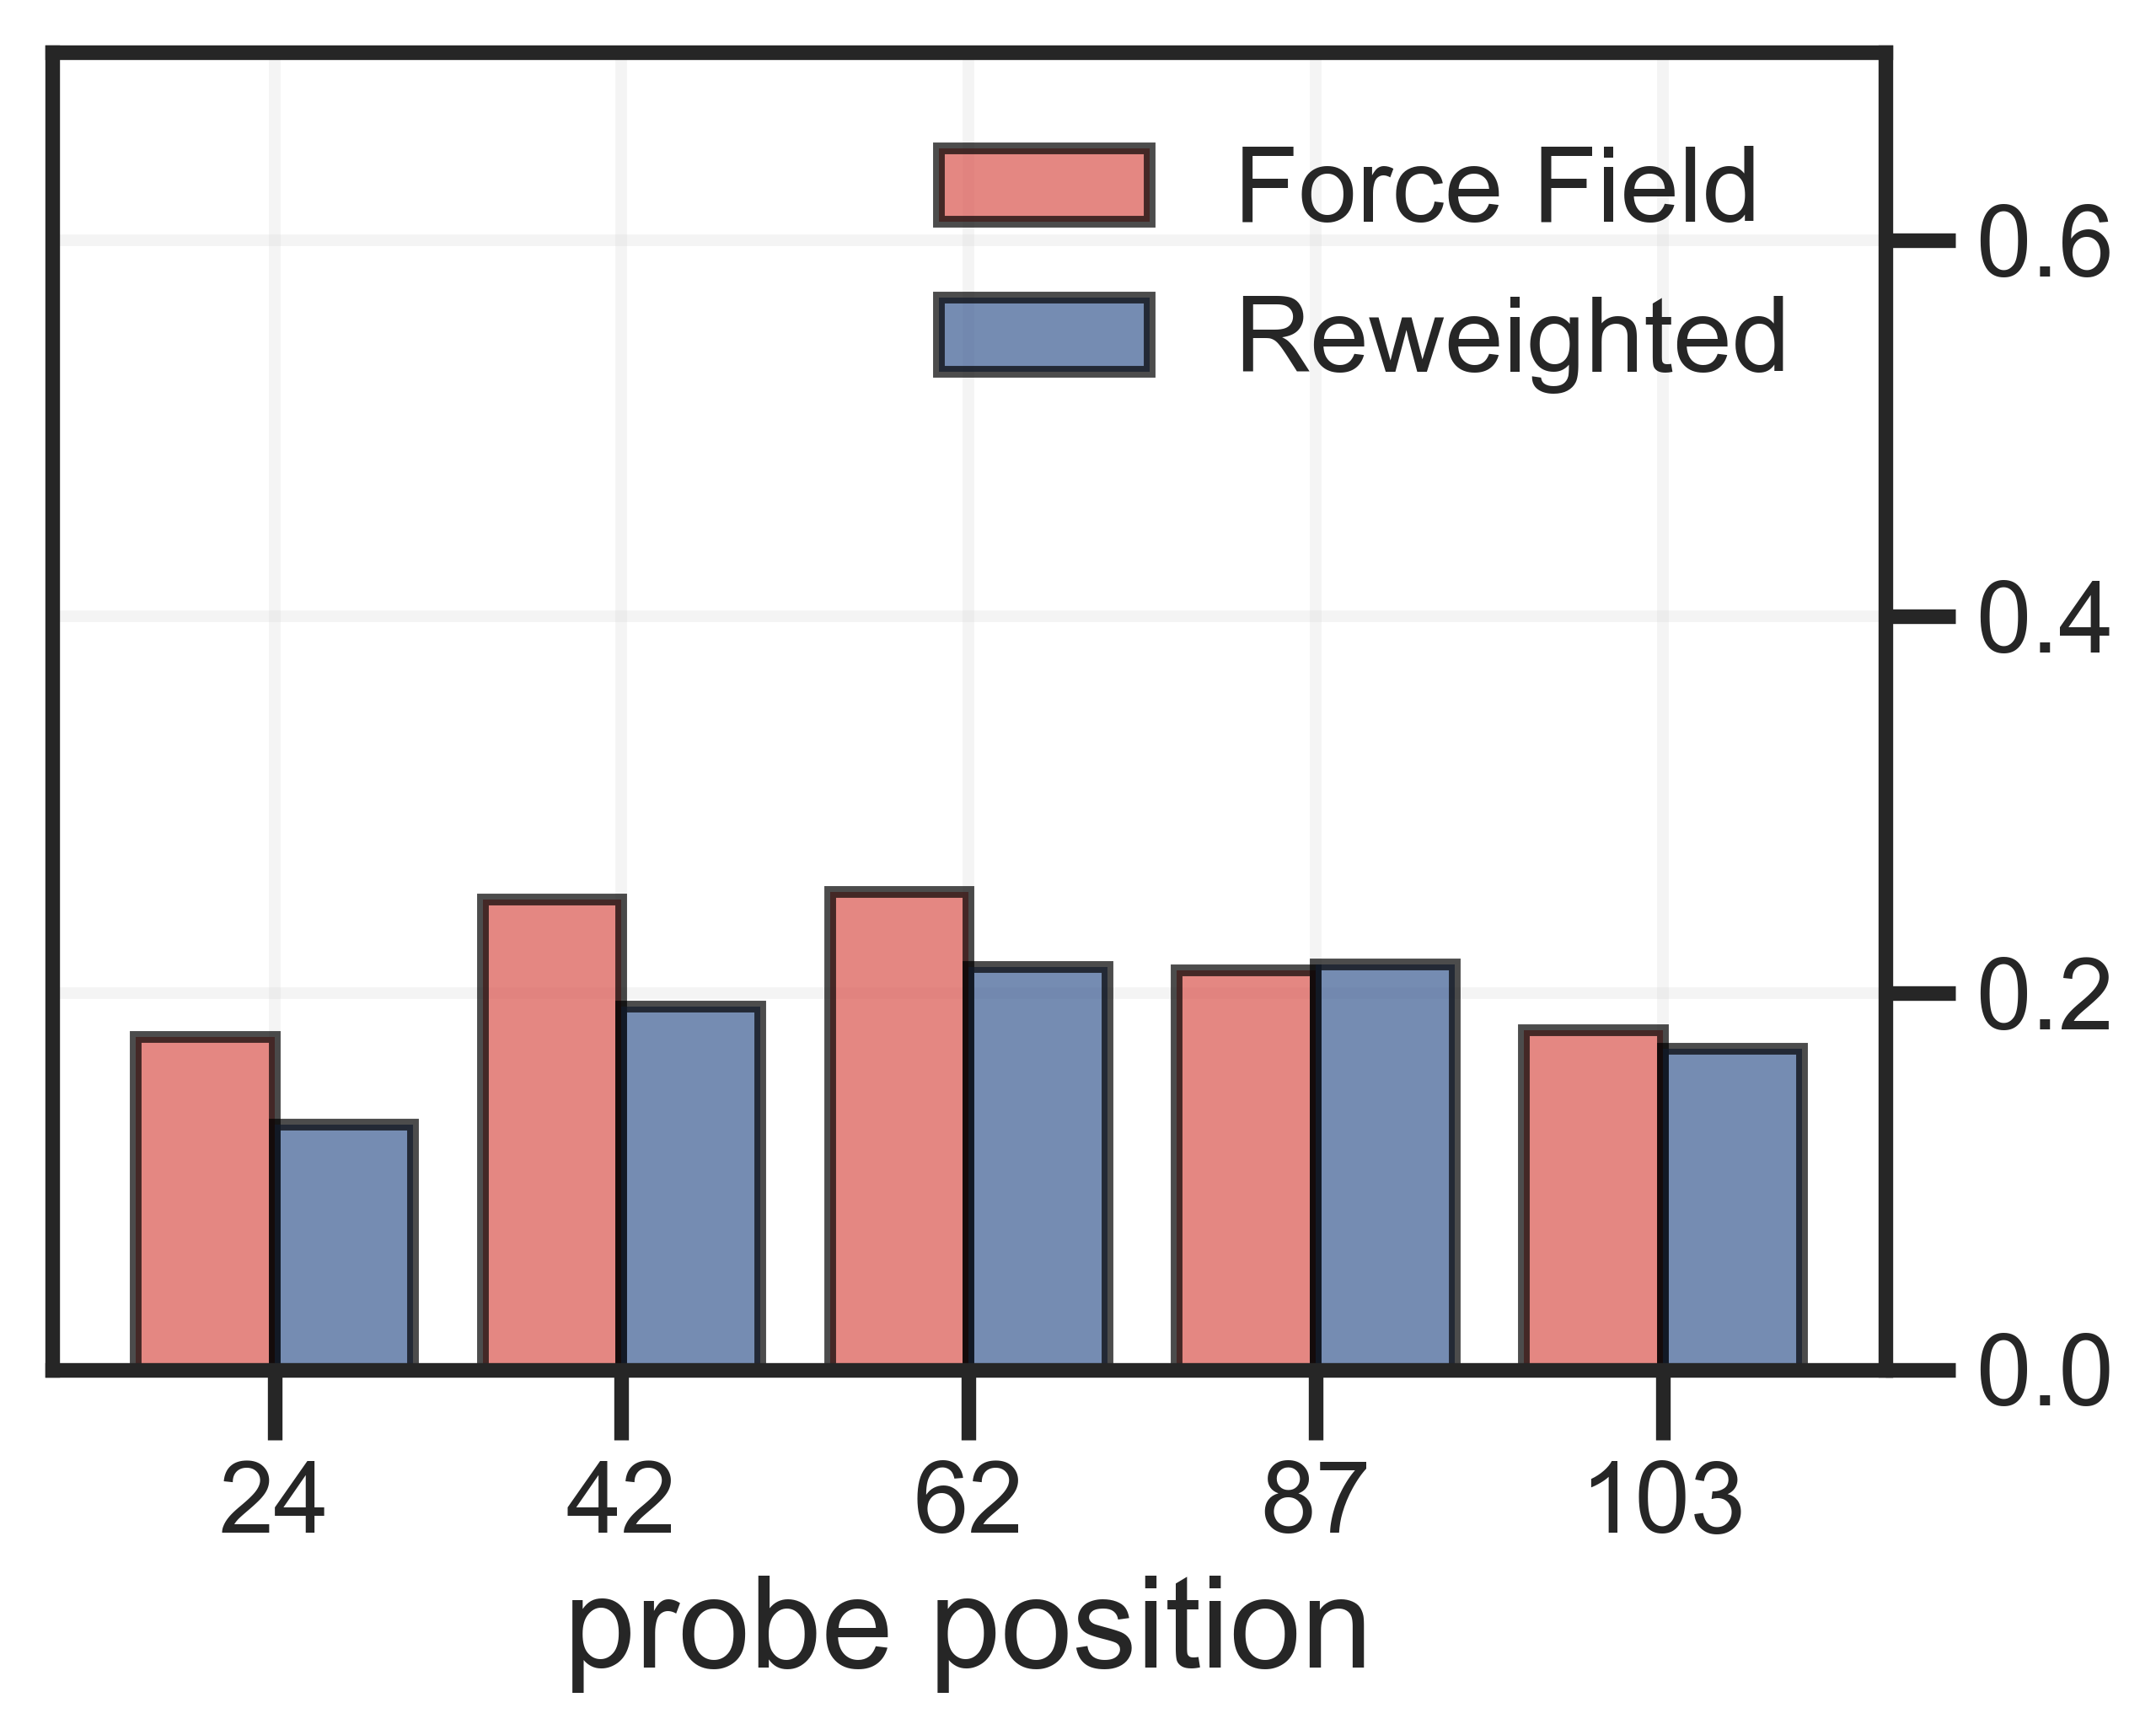

In [11]:
Rew_a99D = [0.01690213165554607,0.037193094787579706,0.04579087995578419,0.046235206936110415,0.029060288152031672]
FF_a99D =  [0.03128123623755817,0.06236458039572526,0.06443839948527559,0.04505254057533368,0.03250331490804816]
a99DW= np.sqrt(np.average(Rew_a99D))
a99DFF= np.sqrt(np.average(FF_a99D))
print a99DFF,a99DW

fig,ax = plt.subplots(1,1,figsize=(5,4))
probelablel= ["0",'24',"42","62",'87','103']
mpl.rcParams['figure.dpi'] = 500
ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FF_a99D),alpha=.7,color=c2,label='Force Field',width=0.4, edgecolor = "black",align='center')
plt.bar(pnr+0.2,np.sqrt(Rew_a99D),alpha=.7,color=c3,label='Reweighted',width=0.4, edgecolor = "black",align='center')
plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=22)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', labelsize=17)
plt.xticks(size=16)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
#plt.ylabel('$RMSD$',fontsize=18)
plt.savefig('a99D-RMSD',dpi=500)
plt.show()

0.323383687802749 0.3168550755268482


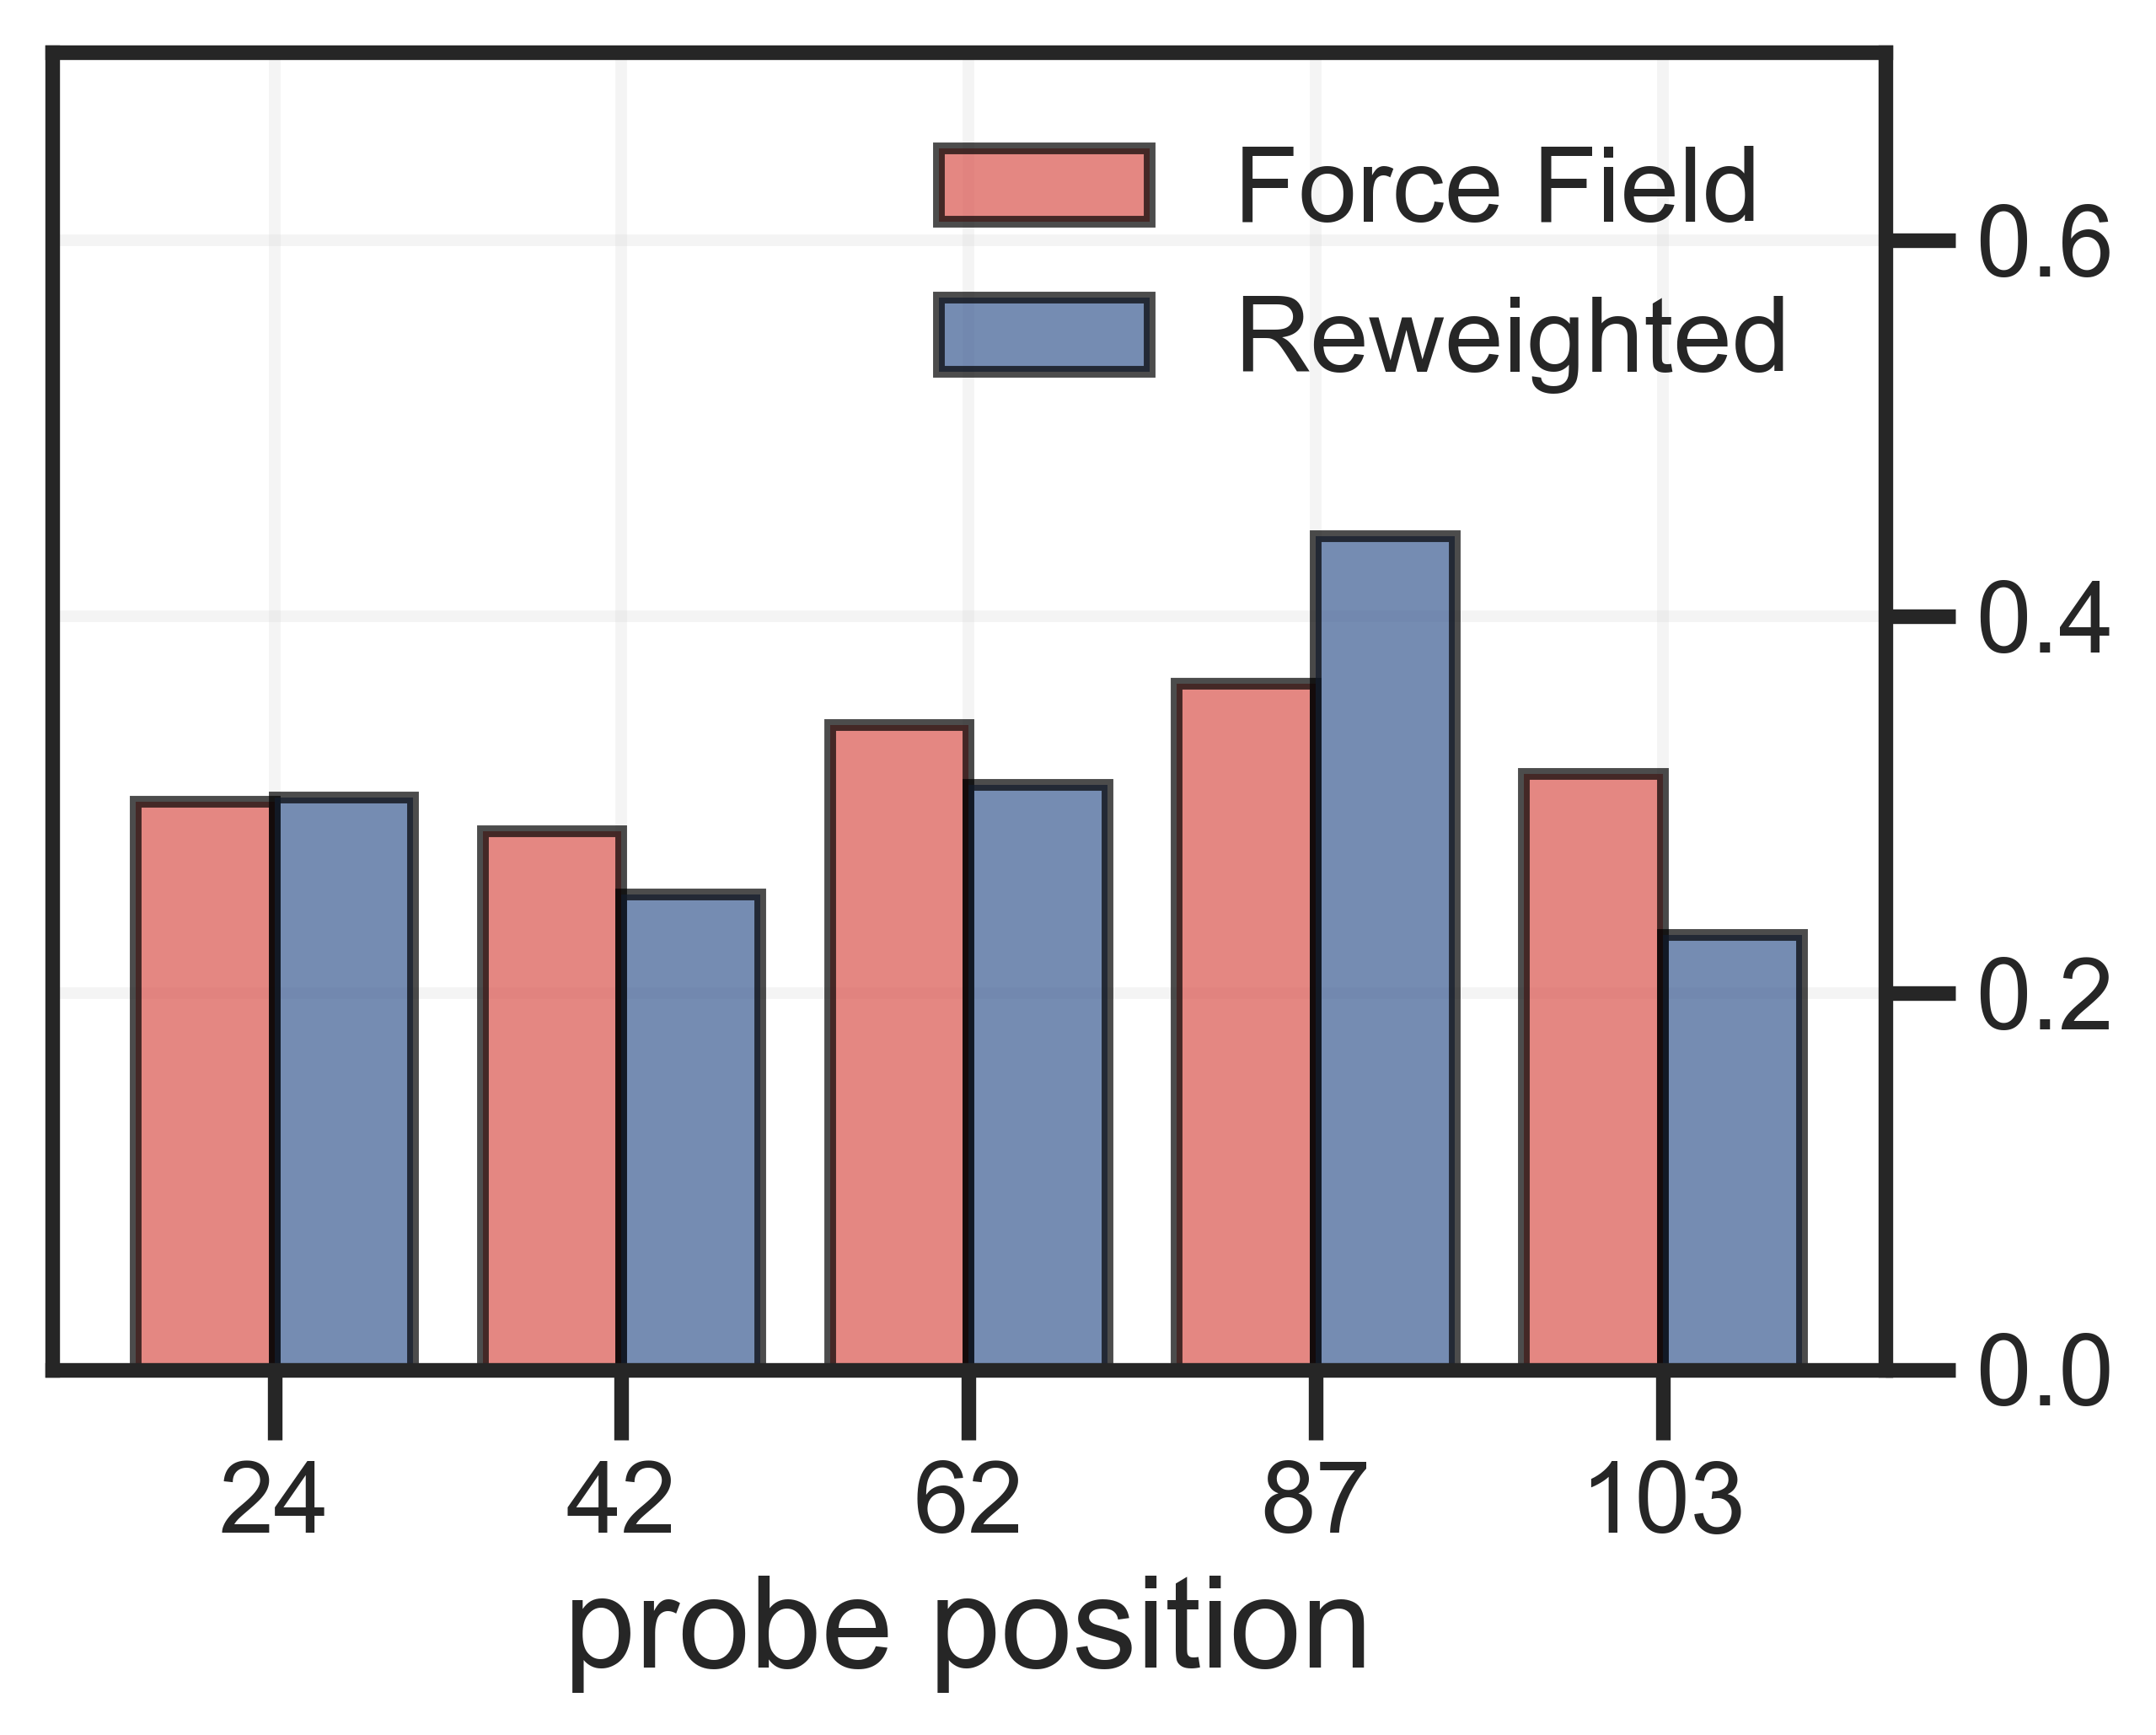

In [12]:
Rew_a99 = [0.09237521084552644,0.0636474264871398,0.09656603590088585,0.19610389517422044,0.05329312602785081]
FF_a99 =  [0.0911288321319761,0.08171072746991817,0.1172602629019442,0.132702995419201,0.10008222976148973]
a99W= np.sqrt(np.mean(Rew_a99))
a99FF= np.sqrt(np.average(FF_a99))
print a99FF,a99W

fig,ax = plt.subplots(1,1,figsize=(5,4))
probelablel= ["0",'24',"42","62",'87','103']
mpl.rcParams['figure.dpi'] = 500
ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FF_a99),alpha=.7,color=c2,label='Force Field',width=0.4,edgecolor = "black", align='center')
plt.bar(pnr+0.2,np.sqrt(Rew_a99),alpha=.7,color=c3,label='Reweighted',width=0.4,edgecolor = "black", align='center')
plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=20)
ax.set_xlabel("probe position",fontsize=22)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', labelsize=17)
plt.xticks(size=16)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
#plt.ylabel('$RMSD$',fontsize=18)
plt.savefig('a99-RMSD',dpi=500)
plt.show()

0.17051458108651987 0.16029029327457645


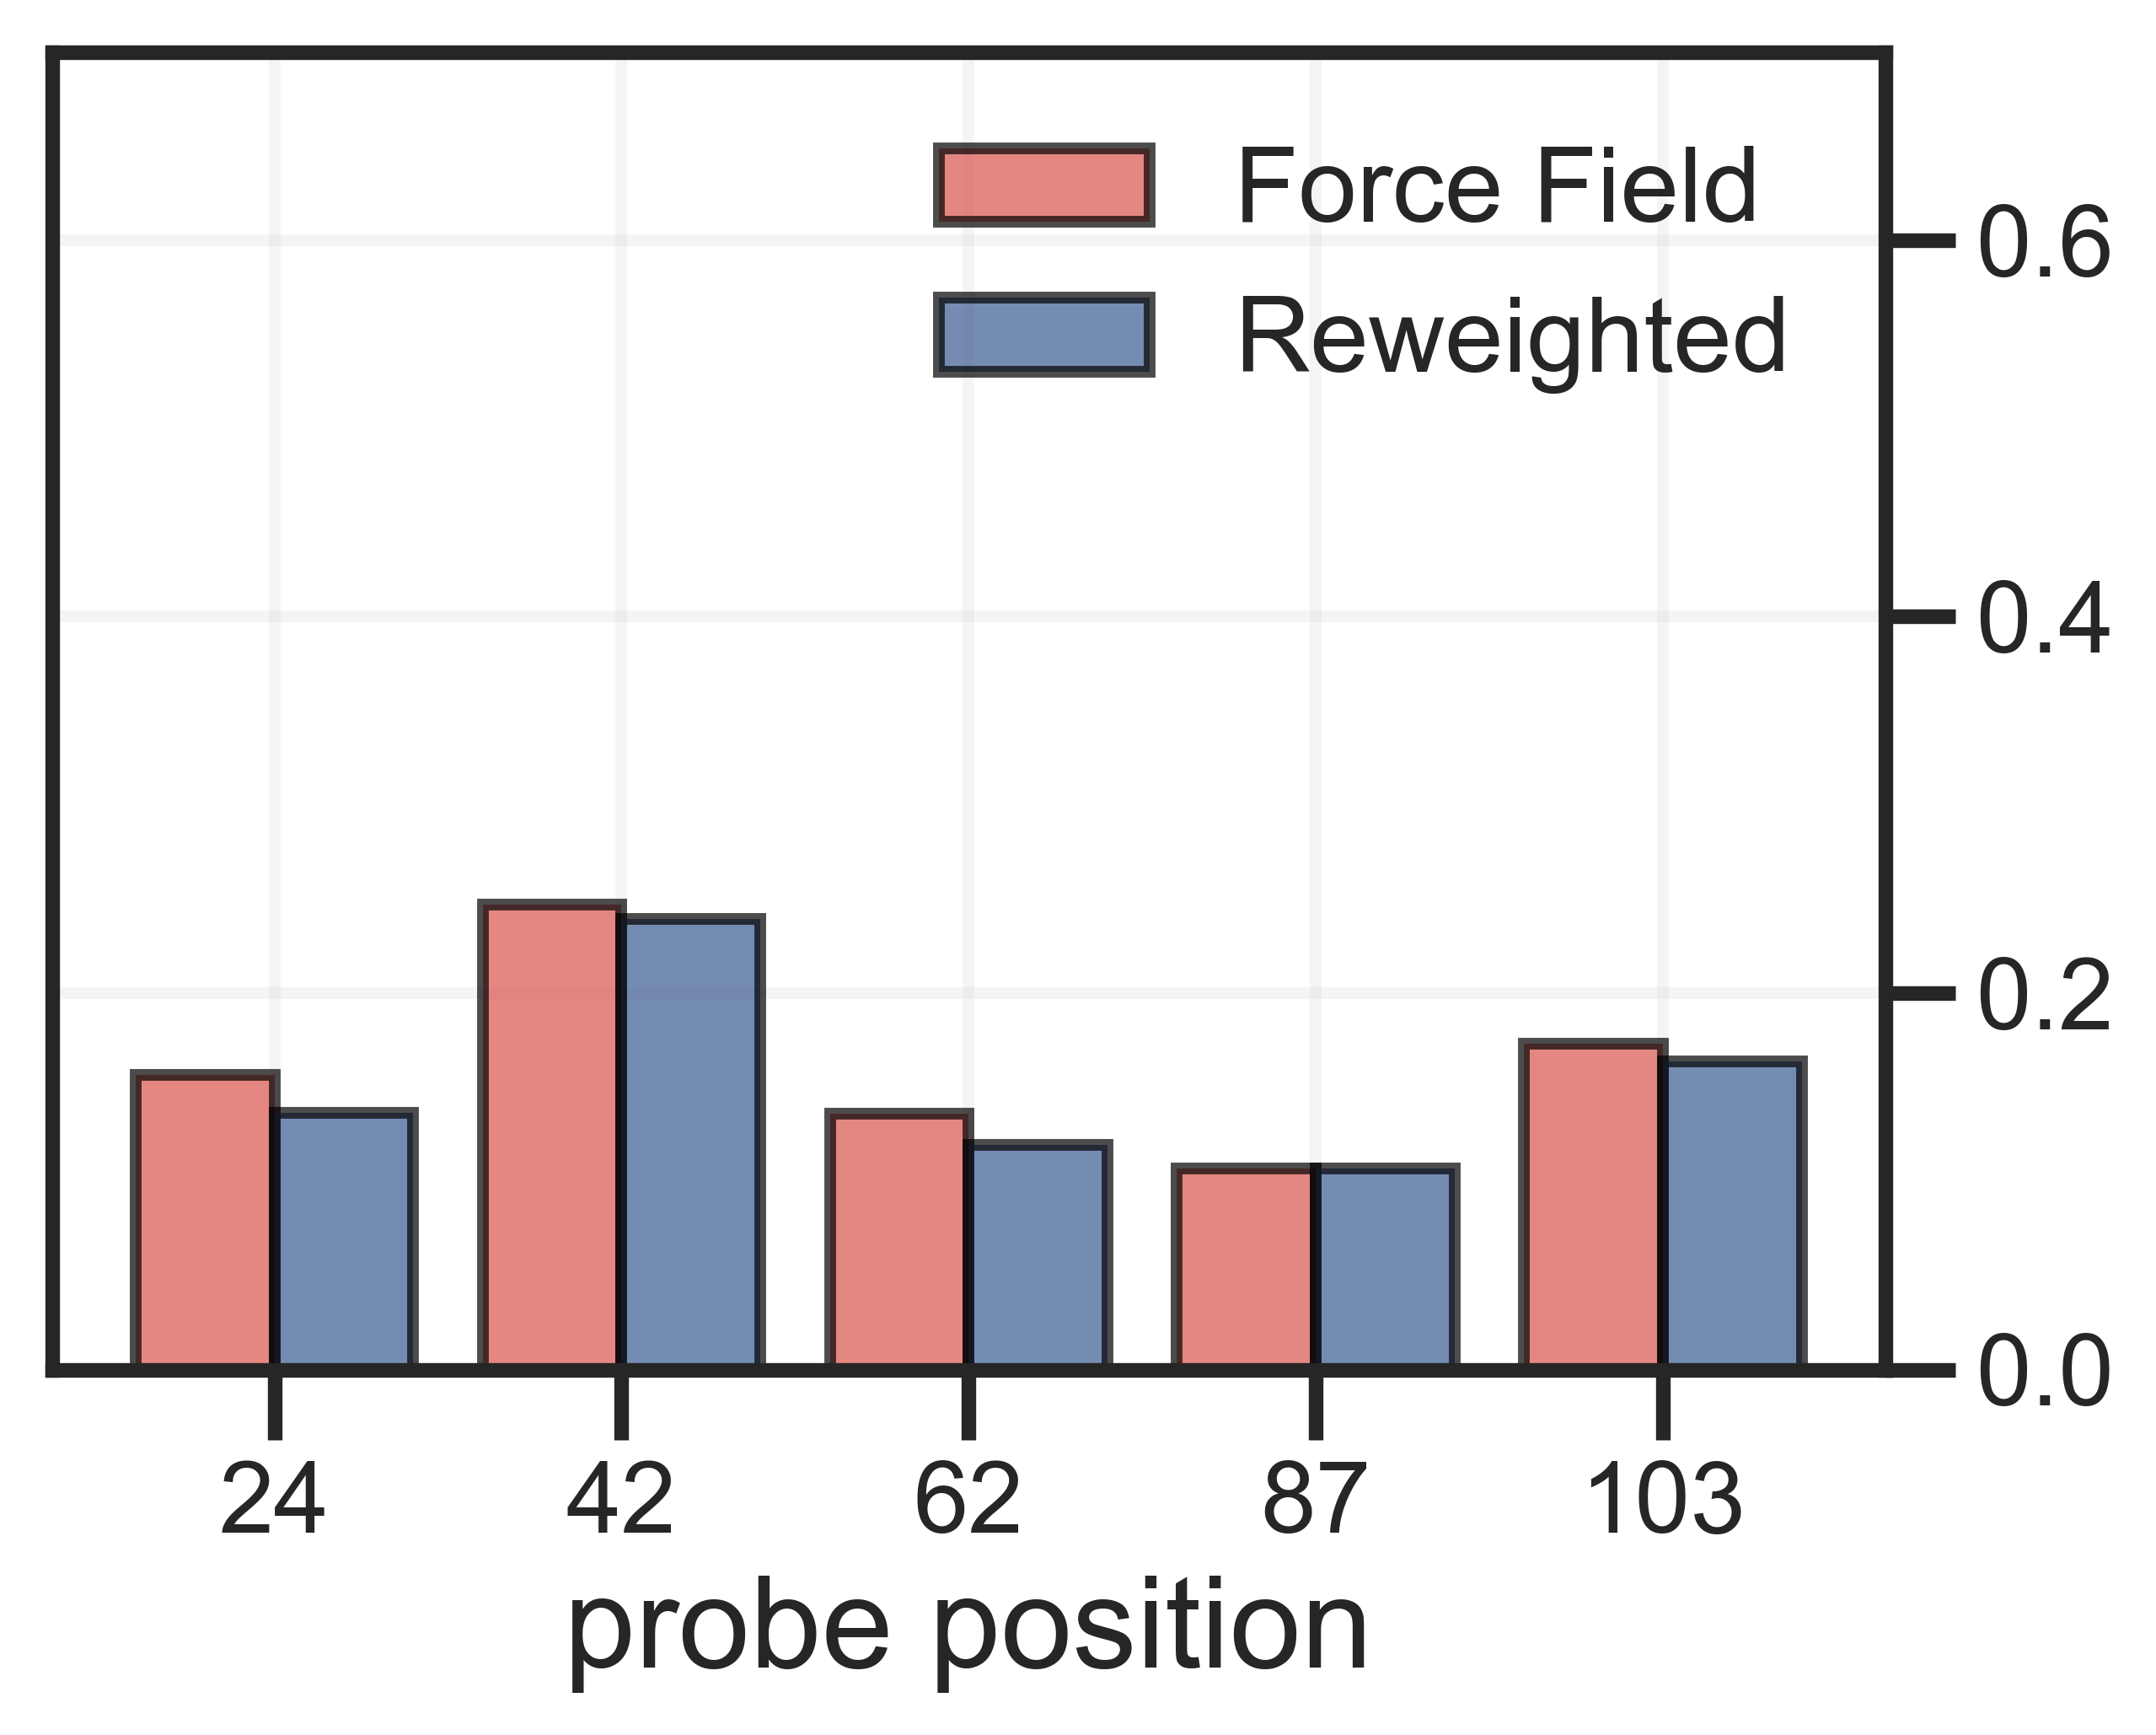

In [13]:
Rew_c22D = [0.018599468008029387,0.0573758354286942,0.014232264842965898,0.011416107668739137,0.026841214641820006]
FF_c22D =  [0.024516967900037455,0.06104017832305613,0.01843147033927979,0.011416107668739137,0.029971387584444304]
c22DW= np.sqrt(np.average(Rew_c22D))
c22DFF= np.sqrt(np.average(FF_c22D))
print c22DFF,c22DW

fig,ax = plt.subplots(1,1,figsize=(5,4))
probelablel= ["0",'24',"42","62",'87','103']
mpl.rcParams['figure.dpi'] = 500
ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FF_c22D),alpha=.7,color=c2,label='Force Field',width=0.4, edgecolor = "black",align='center')
plt.bar(pnr+0.2,np.sqrt(Rew_c22D),alpha=.7,color=c3,label='Reweighted',width=0.4, edgecolor = "black",align='center')
plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=20)
ax.set_xlabel("probe position",fontsize=22)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', labelsize=17)
plt.xticks(size=16)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
#plt.ylabel('$RMSD$',fontsize=18)
plt.savefig('c22D-RMSD',dpi=500)
plt.show()

0.27220171739032195 0.2575516097142964


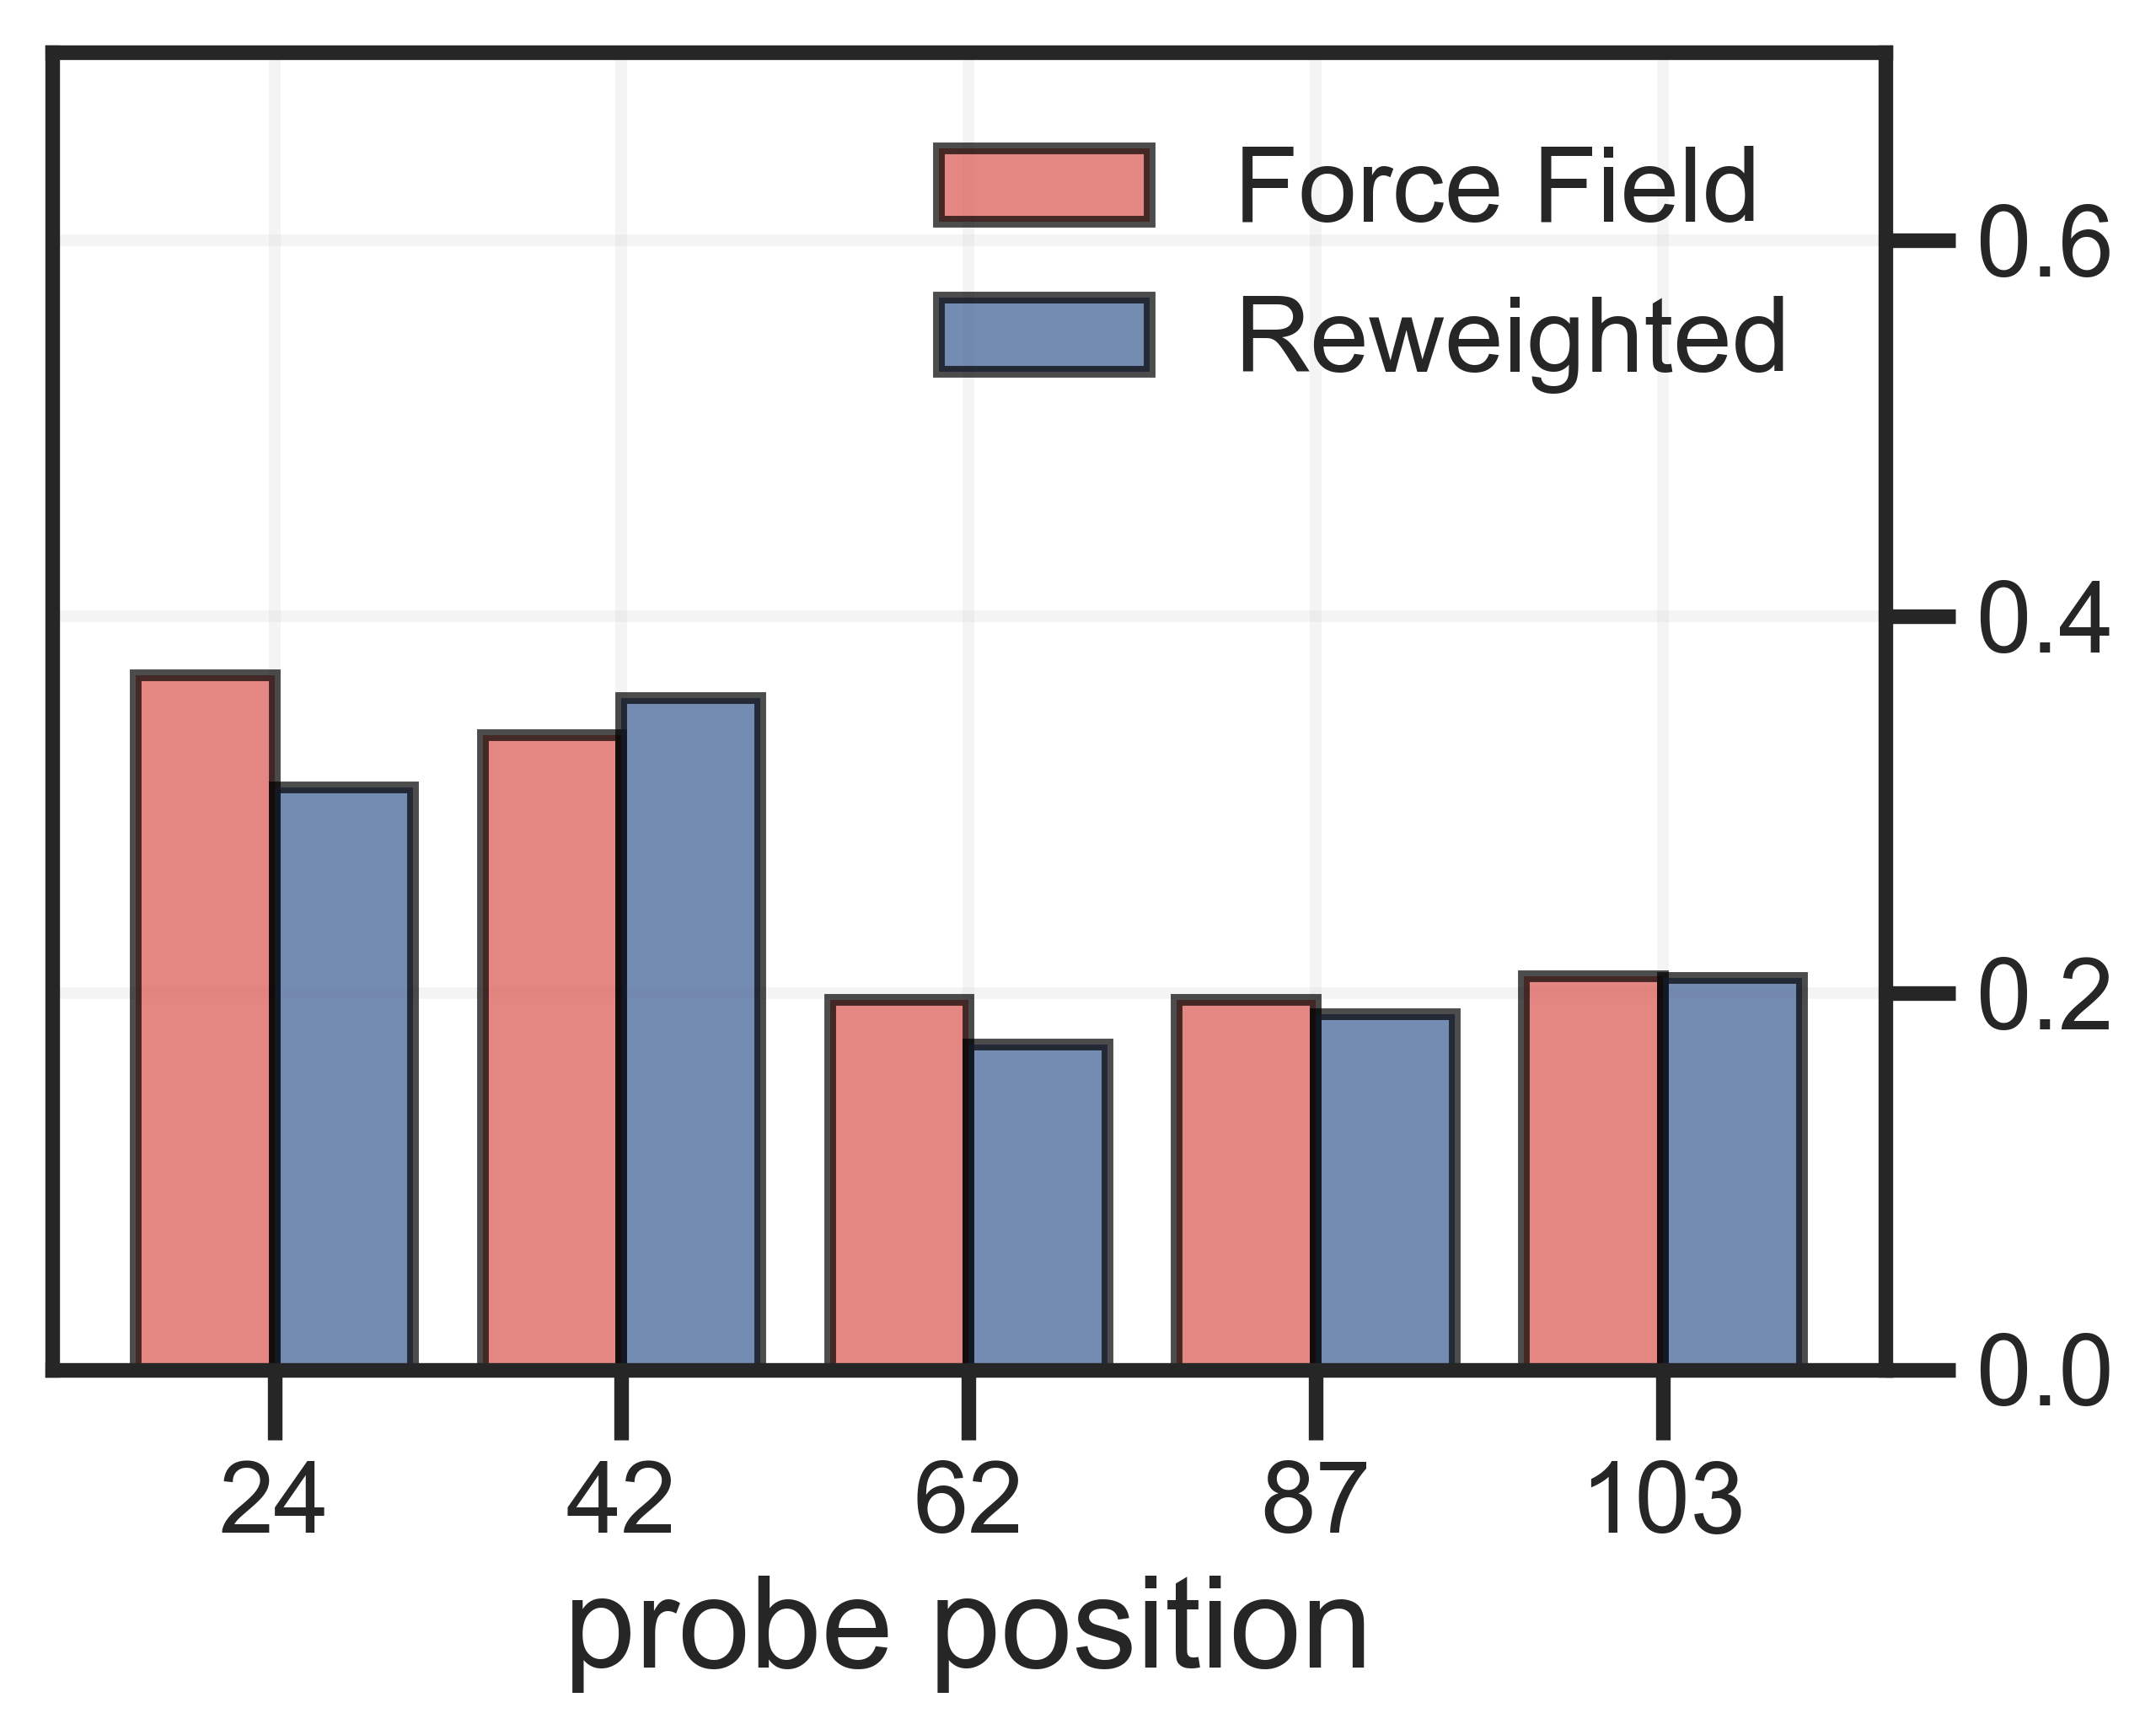

In [14]:
Rew_c22 = [0.09557040440660983,0.1273642568280699,0.029770680009653723,0.03571276485576702,0.04324605223202584]
FF_c22 =  [0.1359550974527352,0.11367150309975546,0.03861065614460814,0.03861065614460814,0.043620961909496575]
c22W= np.sqrt(np.average(Rew_c22))
c22FF= np.sqrt(np.average(FF_c22))
print c22FF,c22W


fig,ax = plt.subplots(1,1,figsize=(5,4))
probelablel= ["0",'24',"42","62",'87','103']
mpl.rcParams['figure.dpi'] = 500
ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FF_c22),alpha=.7,color=c2,label='Force Field',width=0.4,edgecolor = "black", align='center')
plt.bar(pnr+0.2,np.sqrt(Rew_c22),alpha=.7,color=c3,label='Reweighted',width=0.4, edgecolor = "black",align='center')
plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=20)
ax.set_xlabel("probe position",fontsize=22)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', labelsize=17)
plt.xticks(size=16)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
#plt.ylabel('$RMSD$',fontsize=18)
plt.savefig('c22-RMSD',dpi=500)
plt.show()

0.33904620084892284 0.34428636486604836


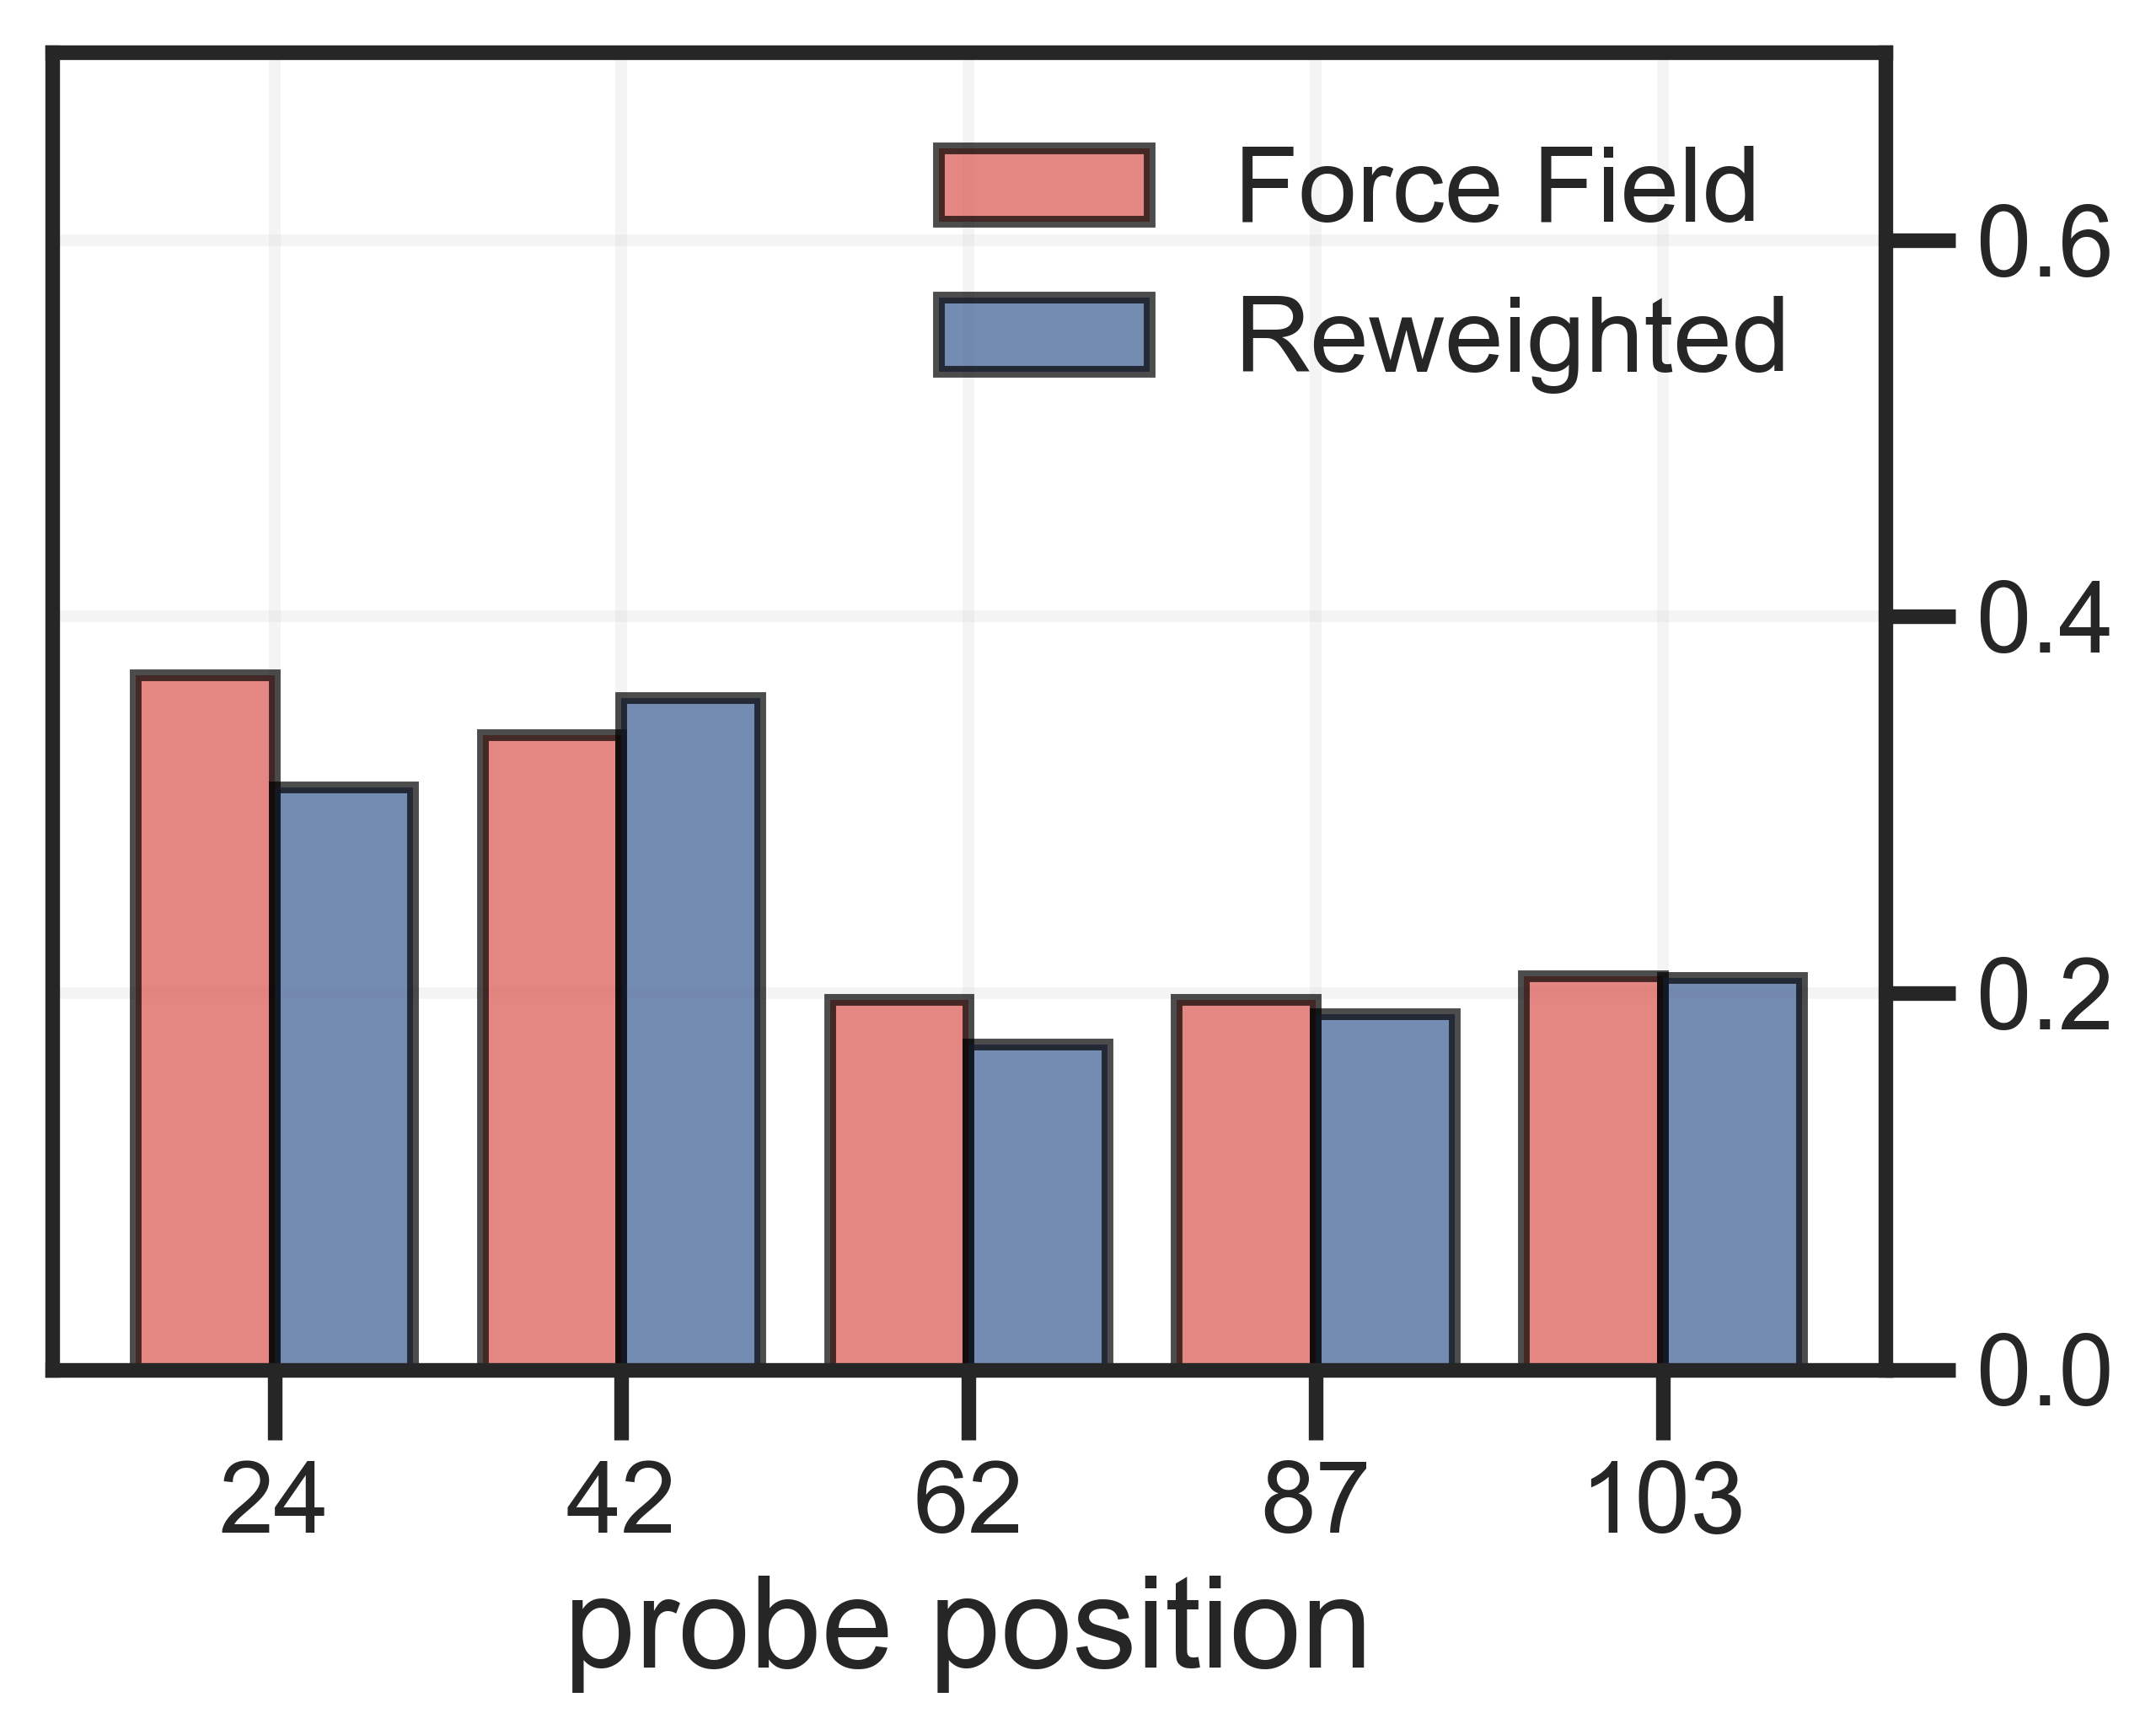

In [15]:
Rew_a99EW = [0.2457543636465785,0.06210107816641614,0.0774302104134366,0.10986956829233648,0.09751028464462119]
FF_a99EW =  [0.23536824687686736,0.06213155983279216,0.079344737203806,0.09633486251874993,0.10158222511822515]
a99EWW= np.sqrt(np.average(Rew_a99EW))
a99EWFF= np.sqrt(np.average(FF_a99EW))
print a99EWFF,a99EWW

fig,ax = plt.subplots(1,1,figsize=(5,4))
probelablel= ["0",'24',"42","62",'87','103']
mpl.rcParams['figure.dpi'] = 500
ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FF_c22),alpha=.7,color=c2,label='Force Field',width=0.4,edgecolor = "black", align='center')
plt.bar(pnr+0.2,np.sqrt(Rew_c22),alpha=.7,color=c3,label='Reweighted',width=0.4,edgecolor = "black", align='center')
plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=22)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', labelsize=17)
plt.xticks(size=16)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
#plt.ylabel('$RMSD$',fontsize=18)
plt.savefig('a99ew-RMSD',dpi=500)
plt.show()

[0 1 2 3 4]
0.16988642144520644 0.19487520656474164


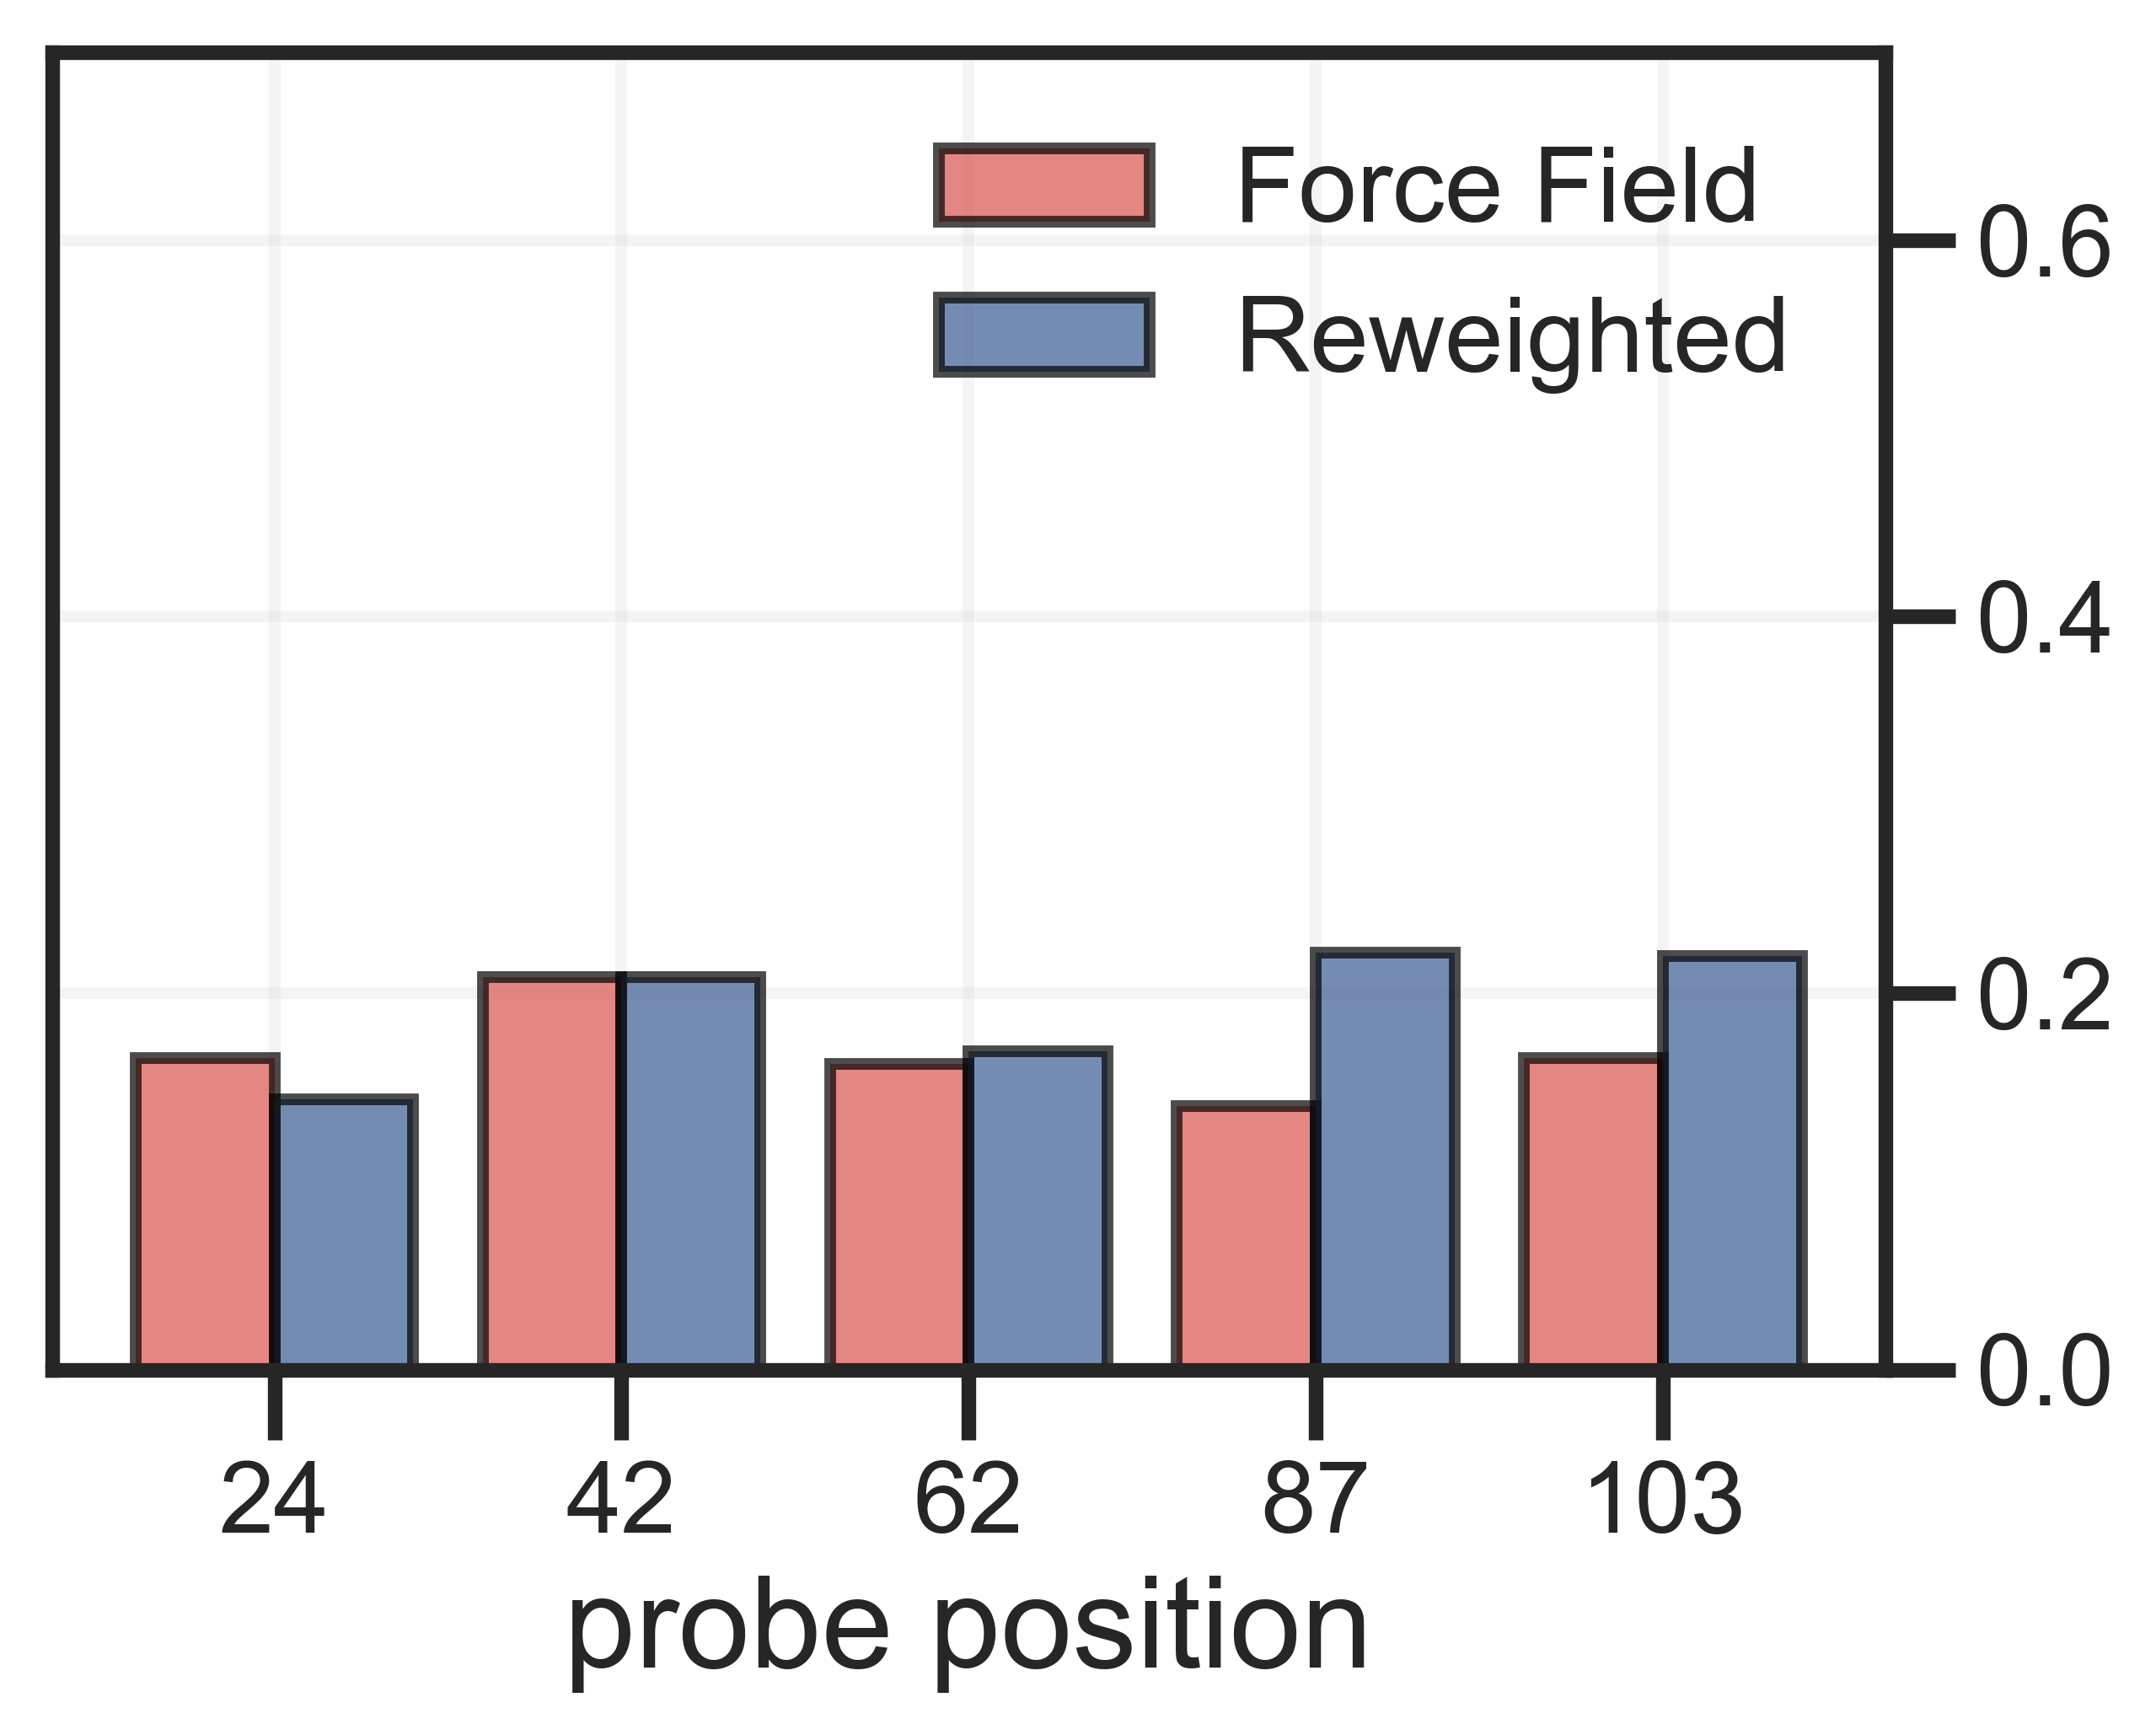

In [16]:
pnr=np.arange(0,5)
print pnr
Rew = [0.020636091623076266,0.04340255002394541,0.02854675457851341,0.048976229326485037,0.0483201051162335]
FF =  [0.027440047092004403,0.04351970452972086,0.026304788519094594,0.019575781831133605,0.02746665898533804] 
mmW= np.sqrt(np.average(Rew))
mmFF= np.sqrt(np.mean(FF))
print mmFF,mmW

fig,ax = plt.subplots(1,1,figsize=(5,4))
probelablel= ["0",'24',"42","62",'87','103']
mpl.rcParams['figure.dpi'] = 500
ax.set_xticklabels(probelablel)
plt.bar(pnr-0.2,np.sqrt(FF),alpha=.7,color=c2,label='Force Field',width=0.4, edgecolor = "black",align='center')
plt.bar(pnr+0.2,np.sqrt(Rew),alpha=.7,color=c3,label='Reweighted',width=0.4, edgecolor = "black",align='center')
plt.legend(fontsize=18,fancybox=False, shadow=False,frameon=False)
ax.set_xlabel("probe position",fontsize=22)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.tick_params(axis='both', labelsize=17)
plt.xticks(size=16)
plt.yticks(size=20)
plt.ylim(0,.7)
plt.grid(alpha=0.2)
#plt.ylabel('$RMSD$',fontsize=18)
plt.savefig('mm_Pre_RMSD',dpi=500)
plt.show()

In [17]:
MSEa99_dispW= np.mean(Rew)
MSEa99_dispFF= np.mean(FF)
MSEa03W= np.mean(Rewa03)
MSEa03FF= np.mean(FFa03)
MSEa12DW= np.average(Rew_a12D)
MSEa12DFF= np.average(FF_a12D)
MSEa12W= np.average(Rew_a12)
MSEa12FF= np.average(FF_a12)
MSEa99DW= np.average(Rew_a99D)
MSEa99DFF= np.average(FF_a99D)
MSEa99W= np.mean(Rew_a99)
MSEa99FF= np.average(FF_a99)
MSEc22DW= np.average(Rew_c22D)
MSEc22DFF= np.average(FF_c22D)
MSEc22W= np.average(Rew_c22)
MSEc22FF= np.average(FF_c22)
MSEa99EWW= np.average(Rew_a99EW)
MSEa99EWFF= np.average(FF_a99EW)
MSE_rew=[MSEa99_dispW,MSEa03W,MSEa12DW,MSEa12W,MSEa99DW,MSEa99W,MSEc22DW,MSEc22W,MSEa99EWW]
MSE_FF= [MSEa99_dispFF,MSEa03FF,MSEa12DFF,MSEa12FF,MSEa99DFF,MSEa99FF,MSEc22DFF,MSEc22FF,MSEa99EWFF]
all_FF= [a12FF,a99FF,c22FF,a99EWFF,c22DFF,a99DFF,a12DFF,a03FF,a99_dispFF,mmFF]
all_rew=[a12W,a99W,c22W,a99EWW,c22DW,a99DW,a12DW,a03W,a99_dispW,mmW]
from matplotlib import pyplot;
from pylab import genfromtxt;
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster")
c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["pale red"]
c3 = sns.xkcd_rgb["denim blue"]
LABELS = ["A12 TIP3P","A999SB-ILDN TIP3P","C22* TIP3P","A99SB-ILDN TIP4P-EW", "C22* TIP4P-D","A999SB-ILDN TIP4P-D","A12 TIP4P", "A03ws TIP4P/2005", "A99SB-$disp$","M&M"]


/Users/musti/Downloads/PREFIX=/Users/musti/Applications/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


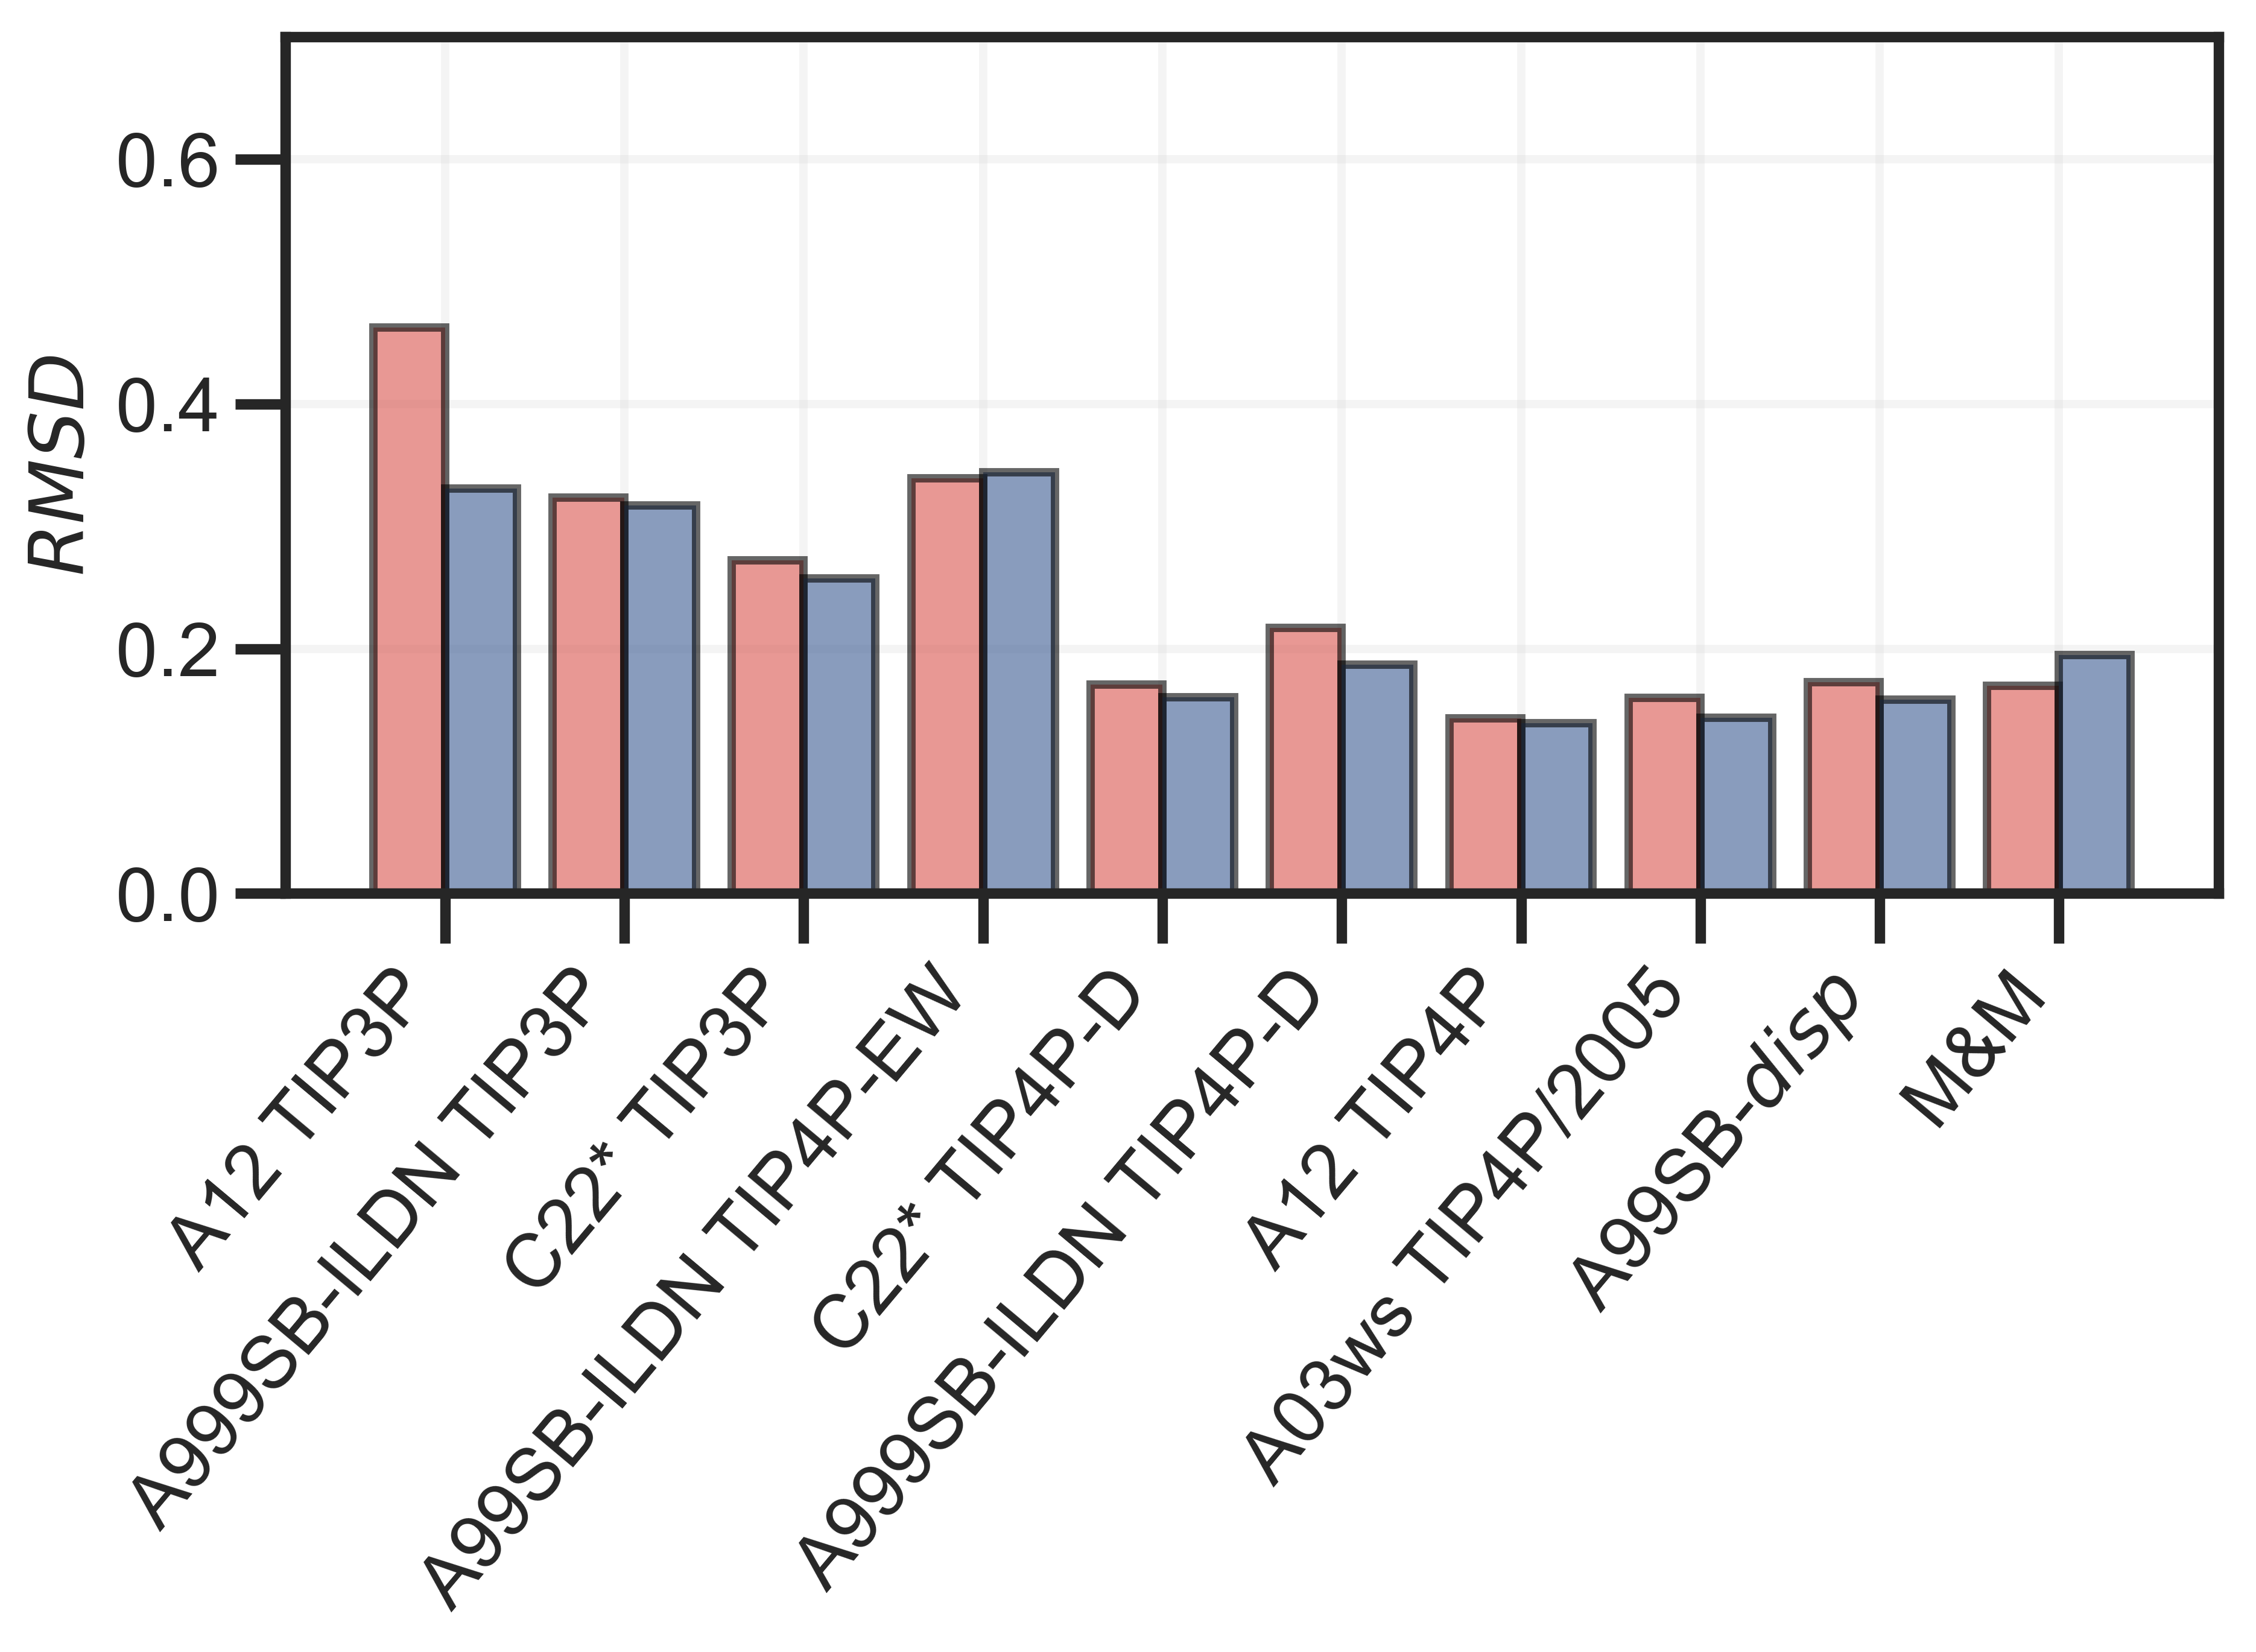

In [18]:

ind = np.arange(0,10,1)  # the x locations for the groups
width = 0.40  # the width of the bars
fig,ax = plt.subplots(1,1,figsize=(8,6))

mpl.rcParams['figure.dpi'] = 500
rects1 = ax.bar(ind - width*0.5, all_FF, width,alpha=0.6, color=c2, edgecolor = "black", label='Force Field RMSD')
rects2 = ax.bar(ind + width*0.5, all_rew, width,alpha=0.6, color=c3,edgecolor = "black",
                label='Reweighted RMSD')

ax.set_ylabel('RMSD')

ax.set_xticks(ind)



def autolabel(rects, xpos='center'):
    
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 4, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

plt.rcParams.update({'legend.fontsize':14})
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('$RMSD$',fontsize=18)

ax.set_xticklabels(LABELS, rotation =50,ha='right',position=(-0.5,0), va='top')
fig.tight_layout()
#plt.xlim(-1, 19)
plt.ylim(0, 0.7)
plt.grid(alpha=0.2)
#plt.savefig('PRE-RMSD',dpi=500)
plt.show()